In [228]:
import networkx as nx

# Create a graph
G = nx.Graph()

# Add edges to the graph
G.add_edges_from([(1, 2), (2, 3), (3, 4)])  # Replace with your graph's edges

# Initialize a dictionary to store the count of each edge
edge_count = {}

# Iterate over all pairs of nodes
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 < node2:
            # Check if there is a path between the nodes
            if nx.has_path(G, node1, node2):
                # Calculate the shortest path between the nodes
                shortest_path = nx.shortest_path(G, node1, node2)
                # Increment the count for each edge in the shortest path
                for i in range(len(shortest_path) - 1):
                    edge = (shortest_path[i], shortest_path[i + 1])
                    undirected_edge = tuple(sorted(edge))
                    edge_count[undirected_edge] = edge_count.get(undirected_edge, 0) + 1

# Print the count of each edge
print(edge_count)



{(1, 2): 3, (2, 3): 4, (3, 4): 3}


{(1, 5): 14, (2, 5): 14, (3, 5): 14, (4, 5): 14, (5, 6): 50, (5, 7): 50, (6, 8): 14, (6, 9): 14, (6, 10): 14, (6, 11): 14, (7, 12): 14, (7, 13): 14, (7, 14): 14, (7, 15): 14}


/tmp/ipykernel_21732/3986668331.py:57: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  edge_collection = nx.draw_networkx_edges(
/tmp/ipykernel_21732/3986668331.py:73: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm, orientation='vertical', pad=0.01)


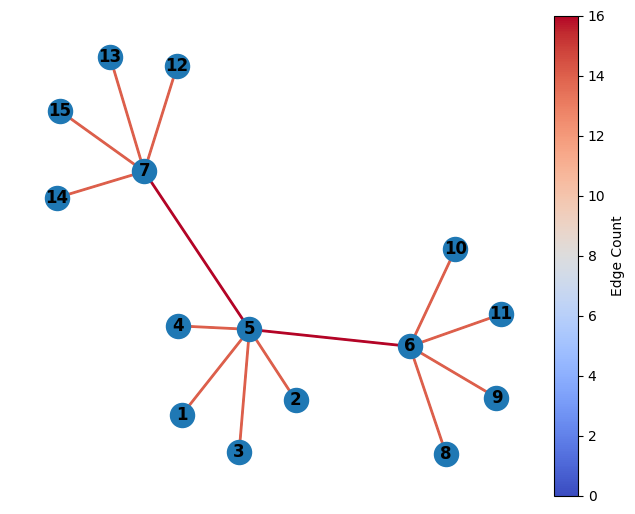

In [288]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

# Create a graph
G = nx.Graph()
#edges=[(1, 4),(2,4),(3,4),(4,5),(5,8),(5,7),(5,6),(5,9),(4,10)] #illustrated real graph
#edges=[(1,4),(2,4),(3,4),(4,5),(4,6),(4,7),(4,8),(4,9),(4,10)]
edges=((1,2),(2,3),(2,4)) #4 nodes, GUS
edges=((1,2),(2,3),(3,4)) #4 nodes, NOJGUS
edges=[(1,3),(2,3),(3,4),(3,5),(3,6)] #6 nodes GUS 
#edges=[(1,3),(2,3),(3,4),(4,5),(4,6)] #6 bodes NONGUS
#edges=[(1,3),(2,3),(3,4),(3,5),(3,6),(3,7),(3,8)] #8 nodes gus
#edges=[(1,3),(2,3),(3,4),(3,5),(5,6),(5,7),(5,8)] #8 nodes nongus
#edges=[(1, 4),(2,4),(3,4),(4,5),(5,8),(5,7),(5,6),(5,9),(4,10)] #10 nodes nongus
#edges=[(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10)] #10 nodes gus
#edges=[(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10),(1,11),(1,12)] #12 nodes gus
#edges=[(1, 4),(2,4),(3,4),(4,5),(5,8),(5,7),(5,6),(5,9),(4,10),(11,4),(12,5)] #12 nodes nongus
#edges=[(1,2),(1,3),(1,4),(1,5),(1,6),(1,7),(1,8),(1,9),(1,10),(1,11),(1,12),(1,14),(1,15)] #14 nodes gus
#edges=[(1, 4),(2,4),(3,4),(4,5),(5,8),(5,7),(5,6),(5,9),(4,10),(11,4),(12,5),(13,5),(14,4)] #14 nodes nongus

edges= [(1,2),(2,3),(2,4),(4,5),(4,6),(2,7),(7,8),(7,9)] #9 nodes, nongus
edges=[(1,3),(2,3),(3,4),(3,5),(3,6),(3,7),(3,8),(3,9)] #9 nodes Gus
edges=[(1,4),(2,4),(3,4),(4,5),(4,9),(5,6),(5,7),(5,8),(9,10),(9,11),(9,12)] #12 nodes nongus
edges=[(1,4),(2,4),(3,4),(4,5),(4,6),(4,7),(4,8),(4,9),(4,10),(4,11),(4,12)] #12 edges gus
edges=[(1,5),(2,5),(3,5),(4,5),(5,6),(5,7),(5,8),(5,9),(5,10),(5,11),(5,12),(5,13),(5,14),(5,15)] #15 edges gus
edges=[(1,5),(2,5),(3,5),(4,5),(5,6),(5,7),(6,8),(6,9),(6,10),(6,11),(7,12),(7,13),(7,14),(7,15)] #15 edges nongus
# Add edges to the graph
G.add_edges_from(edges)  # Replace with your graph's edges

# Initialize a dictionary to store the count of each edge
edge_count = {}

# Iterate over all pairs of nodes
for node1 in G.nodes():
    for node2 in G.nodes():
        if node1 < node2:
            # Check if there is a path between the nodes
            if nx.has_path(G, node1, node2):
                # Calculate the shortest path between the nodes
                shortest_path = nx.shortest_path(G, node1, node2)
                # Increment the count for each edge in the shortest path
                for i in range(len(shortest_path) - 1):
                    edge = (shortest_path[i], shortest_path[i + 1])
                    undirected_edge = tuple(sorted(edge))
                    edge_count[undirected_edge] = edge_count.get(undirected_edge, 0) + 1
print(edge_count)
# Create a list of edge colors based on edge_count
#edge_colors = [edge_count[edge] for edge in G.edges()]
edge_colors=[edge_count[edge] for edge in edge_count]
# Draw the graph with edge colors
pos = nx.spring_layout(G)  # You can use different layout algorithms
nx.draw(G, pos, with_labels=True, font_weight='bold')
node_col="gray"
# Use draw_networkx_edges to draw edges with the color map
edge_collection = nx.draw_networkx_edges(
    G,
    pos,
    edgelist=G.edges(),
    edge_color=edge_colors,
    edge_cmap=plt.cm.coolwarm,
    width=2.0,
    edge_vmin=0,
    edge_vmax=16
)

# Create a colorbar legend
sm = ScalarMappable(cmap=plt.cm.coolwarm, norm=Normalize(vmin=0, vmax=16))
sm.set_array([])  # You need to set a dummy array for the scalar mappable

# Add the colorbar to the plot
cbar = plt.colorbar(sm, orientation='vertical', pad=0.01)
cbar.set_label('Edge Count')

# Show the plot
plt.show()


In [226]:
print(edge_count)
print(edge_count[(1,4)])
print([edge_count[edge] for edge in edge_count])
[edge_count[edge] for edge in G.edges()]


{(1, 4): 7, (2, 4): 7, (3, 4): 7, (4, 5): 16, (5, 8): 7, (5, 7): 7, (5, 6): 7}
7
[7, 7, 7, 16, 7, 7, 7]


KeyError: (4, 2)

In [308]:
#let's calculate worst case values.

import numpy as np
import csv



import numpy as np

k = [4, 6, 8, 12, 14, 16, 18]
c = [2]
d_i = [1]
ratios = np.arange(0, 10, 0.1).tolist()
csv_file_path="testing_outputs/ratio_between_trees_worst_case.csv"
with open(csv_file_path, 'a', newline='') as csvfile:   
            csvwriter = csv.writer(csvfile, delimiter=',', quotechar=' ', quoting=csv.QUOTE_NONE)
            csvwriter.writerow(["k","c","d_i","d_e","MST","Gusfield"])
for node_nr in k:
    for cluster_nr in c:
        for i in d_i:
            for ratio in ratios:
                mst_max = i * (node_nr - cluster_nr) * (node_nr - 1) + d_i[0] * ratio * (cluster_nr - 1) * (node_nr * ((node_nr - node_nr * (1 / cluster_nr)) / cluster_nr))
                print(mst_max)
                gus_max= i* ((node_nr/cluster_nr)-1)*(node_nr-1)+i*ratio*(node_nr-(node_nr/cluster_nr)*(node_nr-1))
                print(gus_max)
                with open(csv_file_path, 'a', newline='') as csvfile:   
                    csvwriter = csv.writer(csvfile, delimiter=',', quotechar=' ', quoting=csv.QUOTE_NONE)
                    csvwriter.writerow([node_nr,cluster_nr,i,(i*ratio),mst_max])





6.0
3.0
6.4
2.8
6.8
2.6
7.2
2.4
7.6
2.2
8.0
2.0
8.4
1.7999999999999998
8.8
1.5999999999999999
9.2
1.4
9.6
1.2
10.0
1.0
10.4
0.7999999999999998
10.8
0.5999999999999996
11.2
0.3999999999999999
11.600000000000001
0.19999999999999973
12.0
0.0
12.4
-0.20000000000000018
12.8
-0.40000000000000036
13.2
-0.6000000000000001
13.600000000000001
-0.8000000000000003
14.0
-1.0
14.4
-1.2000000000000002
14.8
-1.4000000000000004
15.200000000000001
-1.6000000000000005
15.600000000000001
-1.8000000000000007
16.0
-2.0
16.4
-2.2
16.8
-2.4000000000000004
17.200000000000003
-2.6000000000000005
17.6
-2.8000000000000007
18.0
-3.0
18.4
-3.2
18.8
-3.4000000000000004
19.200000000000003
-3.6000000000000005
19.6
-3.8000000000000007
20.0
-4.0
20.4
-4.2
20.8
-4.4
21.200000000000003
-4.6000000000000005
21.6
-4.800000000000001
22.0
-5.0
22.400000000000002
-5.200000000000001
22.8
-5.4
23.2
-5.6
23.6
-5.800000000000001
24.0
-6.0
24.400000000000002
-6.200000000000001
24.8
-6.4
25.200000000000003
-6.600000000000001
25.6
-6.

In [319]:
import csv
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate MST and Gusfield values
def calculate_values(node_nr, cluster_nr, i, ratio):
    mst_max = i * (node_nr - cluster_nr) * (node_nr - 1) + d_i[0] * ratio * (
            cluster_nr - 1) * (node_nr * ((node_nr - node_nr * (1 / cluster_nr)) / cluster_nr))
    gus_max = i * ((node_nr / cluster_nr) - 1) * (node_nr - 1) + i * ratio * (
            node_nr - (node_nr / cluster_nr) * (node_nr - 1))
    return mst_max, gus_max


# Set up parameters
k = [4, 6, 8, 12, 14, 16, 18]
c = [2]
d_i = [1]
ratios = np.arange(0, 10, 0.1).tolist()
csv_file_path = "testing_outputs/ratio_between_trees_worst_case.csv"

# Write header to CSV
with open(csv_file_path, 'a', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',', quotechar=' ', quoting=csv.QUOTE_NONE)
    csvwriter.writerow(["k", "c", "d_i", "d_e", "MST", "Gusfield"])

# Calculate and write values to CSV
with open(csv_file_path, 'a', newline='') as csvfile:
    csvwriter = csv.writer(csvfile, delimiter=',', quotechar=' ', quoting=csv.QUOTE_NONE)
    for node_nr in k:
        for cluster_nr in c:
            for i in d_i:
                for ratio in ratios:
                    d_e = i * ratio
                    mst_max, gus_max = calculate_values(node_nr, cluster_nr, i, ratio)
                    csvwriter.writerow([node_nr, cluster_nr, i, d_e, mst_max, gus_max])

# Load data from CSV file
data = np.genfromtxt(csv_file_path, delimiter=',', skip_header=1)

# Filter data below 0 for both columns 4 and 5
filtered_data = data[(data[:, 4] >= 0) & (data[:, 5] >= 0)]

# Extract columns from the filtered data
k_values = filtered_data[:, 0]
c_values = filtered_data[:, 1]
d_i_values = filtered_data[:, 2]
d_e_values = filtered_data[:, 3]
mst_values = filtered_data[:, 4]
gusfield_values = filtered_data[:, 5]

# Plotting MST and Gusfield values against the ratio
plt.figure(figsize=(10, 6))
plt.plot(d_e_values, mst_values, label='MST')
plt.plot(d_e_values, gusfield_values, label='Gusfield')
plt.xlabel('d_e (i*ratio)')
plt.ylabel('Values')
plt.title('MST and Gusfield Values (Filtered)')
plt.legend()
plt.show()


ValueError: Some errors were detected !
    Line #702 (got 6 columns instead of 5)
    Line #703 (got 6 columns instead of 5)
    Line #704 (got 6 columns instead of 5)
    Line #705 (got 6 columns instead of 5)
    Line #706 (got 6 columns instead of 5)
    Line #707 (got 6 columns instead of 5)
    Line #708 (got 6 columns instead of 5)
    Line #709 (got 6 columns instead of 5)
    Line #710 (got 6 columns instead of 5)
    Line #711 (got 6 columns instead of 5)
    Line #712 (got 6 columns instead of 5)
    Line #713 (got 6 columns instead of 5)
    Line #714 (got 6 columns instead of 5)
    Line #715 (got 6 columns instead of 5)
    Line #716 (got 6 columns instead of 5)
    Line #717 (got 6 columns instead of 5)
    Line #718 (got 6 columns instead of 5)
    Line #719 (got 6 columns instead of 5)
    Line #720 (got 6 columns instead of 5)
    Line #721 (got 6 columns instead of 5)
    Line #722 (got 6 columns instead of 5)
    Line #723 (got 6 columns instead of 5)
    Line #724 (got 6 columns instead of 5)
    Line #725 (got 6 columns instead of 5)
    Line #726 (got 6 columns instead of 5)
    Line #727 (got 6 columns instead of 5)
    Line #728 (got 6 columns instead of 5)
    Line #729 (got 6 columns instead of 5)
    Line #730 (got 6 columns instead of 5)
    Line #731 (got 6 columns instead of 5)
    Line #732 (got 6 columns instead of 5)
    Line #733 (got 6 columns instead of 5)
    Line #734 (got 6 columns instead of 5)
    Line #735 (got 6 columns instead of 5)
    Line #736 (got 6 columns instead of 5)
    Line #737 (got 6 columns instead of 5)
    Line #738 (got 6 columns instead of 5)
    Line #739 (got 6 columns instead of 5)
    Line #740 (got 6 columns instead of 5)
    Line #741 (got 6 columns instead of 5)
    Line #742 (got 6 columns instead of 5)
    Line #743 (got 6 columns instead of 5)
    Line #744 (got 6 columns instead of 5)
    Line #745 (got 6 columns instead of 5)
    Line #746 (got 6 columns instead of 5)
    Line #747 (got 6 columns instead of 5)
    Line #748 (got 6 columns instead of 5)
    Line #749 (got 6 columns instead of 5)
    Line #750 (got 6 columns instead of 5)
    Line #751 (got 6 columns instead of 5)
    Line #752 (got 6 columns instead of 5)
    Line #753 (got 6 columns instead of 5)
    Line #754 (got 6 columns instead of 5)
    Line #755 (got 6 columns instead of 5)
    Line #756 (got 6 columns instead of 5)
    Line #757 (got 6 columns instead of 5)
    Line #758 (got 6 columns instead of 5)
    Line #759 (got 6 columns instead of 5)
    Line #760 (got 6 columns instead of 5)
    Line #761 (got 6 columns instead of 5)
    Line #762 (got 6 columns instead of 5)
    Line #763 (got 6 columns instead of 5)
    Line #764 (got 6 columns instead of 5)
    Line #765 (got 6 columns instead of 5)
    Line #766 (got 6 columns instead of 5)
    Line #767 (got 6 columns instead of 5)
    Line #768 (got 6 columns instead of 5)
    Line #769 (got 6 columns instead of 5)
    Line #770 (got 6 columns instead of 5)
    Line #771 (got 6 columns instead of 5)
    Line #772 (got 6 columns instead of 5)
    Line #773 (got 6 columns instead of 5)
    Line #774 (got 6 columns instead of 5)
    Line #775 (got 6 columns instead of 5)
    Line #776 (got 6 columns instead of 5)
    Line #777 (got 6 columns instead of 5)
    Line #778 (got 6 columns instead of 5)
    Line #779 (got 6 columns instead of 5)
    Line #780 (got 6 columns instead of 5)
    Line #781 (got 6 columns instead of 5)
    Line #782 (got 6 columns instead of 5)
    Line #783 (got 6 columns instead of 5)
    Line #784 (got 6 columns instead of 5)
    Line #785 (got 6 columns instead of 5)
    Line #786 (got 6 columns instead of 5)
    Line #787 (got 6 columns instead of 5)
    Line #788 (got 6 columns instead of 5)
    Line #789 (got 6 columns instead of 5)
    Line #790 (got 6 columns instead of 5)
    Line #791 (got 6 columns instead of 5)
    Line #792 (got 6 columns instead of 5)
    Line #793 (got 6 columns instead of 5)
    Line #794 (got 6 columns instead of 5)
    Line #795 (got 6 columns instead of 5)
    Line #796 (got 6 columns instead of 5)
    Line #797 (got 6 columns instead of 5)
    Line #798 (got 6 columns instead of 5)
    Line #799 (got 6 columns instead of 5)
    Line #800 (got 6 columns instead of 5)
    Line #801 (got 6 columns instead of 5)
    Line #802 (got 6 columns instead of 5)
    Line #803 (got 6 columns instead of 5)
    Line #804 (got 6 columns instead of 5)
    Line #805 (got 6 columns instead of 5)
    Line #806 (got 6 columns instead of 5)
    Line #807 (got 6 columns instead of 5)
    Line #808 (got 6 columns instead of 5)
    Line #809 (got 6 columns instead of 5)
    Line #810 (got 6 columns instead of 5)
    Line #811 (got 6 columns instead of 5)
    Line #812 (got 6 columns instead of 5)
    Line #813 (got 6 columns instead of 5)
    Line #814 (got 6 columns instead of 5)
    Line #815 (got 6 columns instead of 5)
    Line #816 (got 6 columns instead of 5)
    Line #817 (got 6 columns instead of 5)
    Line #818 (got 6 columns instead of 5)
    Line #819 (got 6 columns instead of 5)
    Line #820 (got 6 columns instead of 5)
    Line #821 (got 6 columns instead of 5)
    Line #822 (got 6 columns instead of 5)
    Line #823 (got 6 columns instead of 5)
    Line #824 (got 6 columns instead of 5)
    Line #825 (got 6 columns instead of 5)
    Line #826 (got 6 columns instead of 5)
    Line #827 (got 6 columns instead of 5)
    Line #828 (got 6 columns instead of 5)
    Line #829 (got 6 columns instead of 5)
    Line #830 (got 6 columns instead of 5)
    Line #831 (got 6 columns instead of 5)
    Line #832 (got 6 columns instead of 5)
    Line #833 (got 6 columns instead of 5)
    Line #834 (got 6 columns instead of 5)
    Line #835 (got 6 columns instead of 5)
    Line #836 (got 6 columns instead of 5)
    Line #837 (got 6 columns instead of 5)
    Line #838 (got 6 columns instead of 5)
    Line #839 (got 6 columns instead of 5)
    Line #840 (got 6 columns instead of 5)
    Line #841 (got 6 columns instead of 5)
    Line #842 (got 6 columns instead of 5)
    Line #843 (got 6 columns instead of 5)
    Line #844 (got 6 columns instead of 5)
    Line #845 (got 6 columns instead of 5)
    Line #846 (got 6 columns instead of 5)
    Line #847 (got 6 columns instead of 5)
    Line #848 (got 6 columns instead of 5)
    Line #849 (got 6 columns instead of 5)
    Line #850 (got 6 columns instead of 5)
    Line #851 (got 6 columns instead of 5)
    Line #852 (got 6 columns instead of 5)
    Line #853 (got 6 columns instead of 5)
    Line #854 (got 6 columns instead of 5)
    Line #855 (got 6 columns instead of 5)
    Line #856 (got 6 columns instead of 5)
    Line #857 (got 6 columns instead of 5)
    Line #858 (got 6 columns instead of 5)
    Line #859 (got 6 columns instead of 5)
    Line #860 (got 6 columns instead of 5)
    Line #861 (got 6 columns instead of 5)
    Line #862 (got 6 columns instead of 5)
    Line #863 (got 6 columns instead of 5)
    Line #864 (got 6 columns instead of 5)
    Line #865 (got 6 columns instead of 5)
    Line #866 (got 6 columns instead of 5)
    Line #867 (got 6 columns instead of 5)
    Line #868 (got 6 columns instead of 5)
    Line #869 (got 6 columns instead of 5)
    Line #870 (got 6 columns instead of 5)
    Line #871 (got 6 columns instead of 5)
    Line #872 (got 6 columns instead of 5)
    Line #873 (got 6 columns instead of 5)
    Line #874 (got 6 columns instead of 5)
    Line #875 (got 6 columns instead of 5)
    Line #876 (got 6 columns instead of 5)
    Line #877 (got 6 columns instead of 5)
    Line #878 (got 6 columns instead of 5)
    Line #879 (got 6 columns instead of 5)
    Line #880 (got 6 columns instead of 5)
    Line #881 (got 6 columns instead of 5)
    Line #882 (got 6 columns instead of 5)
    Line #883 (got 6 columns instead of 5)
    Line #884 (got 6 columns instead of 5)
    Line #885 (got 6 columns instead of 5)
    Line #886 (got 6 columns instead of 5)
    Line #887 (got 6 columns instead of 5)
    Line #888 (got 6 columns instead of 5)
    Line #889 (got 6 columns instead of 5)
    Line #890 (got 6 columns instead of 5)
    Line #891 (got 6 columns instead of 5)
    Line #892 (got 6 columns instead of 5)
    Line #893 (got 6 columns instead of 5)
    Line #894 (got 6 columns instead of 5)
    Line #895 (got 6 columns instead of 5)
    Line #896 (got 6 columns instead of 5)
    Line #897 (got 6 columns instead of 5)
    Line #898 (got 6 columns instead of 5)
    Line #899 (got 6 columns instead of 5)
    Line #900 (got 6 columns instead of 5)
    Line #901 (got 6 columns instead of 5)
    Line #902 (got 6 columns instead of 5)
    Line #903 (got 6 columns instead of 5)
    Line #904 (got 6 columns instead of 5)
    Line #905 (got 6 columns instead of 5)
    Line #906 (got 6 columns instead of 5)
    Line #907 (got 6 columns instead of 5)
    Line #908 (got 6 columns instead of 5)
    Line #909 (got 6 columns instead of 5)
    Line #910 (got 6 columns instead of 5)
    Line #911 (got 6 columns instead of 5)
    Line #912 (got 6 columns instead of 5)
    Line #913 (got 6 columns instead of 5)
    Line #914 (got 6 columns instead of 5)
    Line #915 (got 6 columns instead of 5)
    Line #916 (got 6 columns instead of 5)
    Line #917 (got 6 columns instead of 5)
    Line #918 (got 6 columns instead of 5)
    Line #919 (got 6 columns instead of 5)
    Line #920 (got 6 columns instead of 5)
    Line #921 (got 6 columns instead of 5)
    Line #922 (got 6 columns instead of 5)
    Line #923 (got 6 columns instead of 5)
    Line #924 (got 6 columns instead of 5)
    Line #925 (got 6 columns instead of 5)
    Line #926 (got 6 columns instead of 5)
    Line #927 (got 6 columns instead of 5)
    Line #928 (got 6 columns instead of 5)
    Line #929 (got 6 columns instead of 5)
    Line #930 (got 6 columns instead of 5)
    Line #931 (got 6 columns instead of 5)
    Line #932 (got 6 columns instead of 5)
    Line #933 (got 6 columns instead of 5)
    Line #934 (got 6 columns instead of 5)
    Line #935 (got 6 columns instead of 5)
    Line #936 (got 6 columns instead of 5)
    Line #937 (got 6 columns instead of 5)
    Line #938 (got 6 columns instead of 5)
    Line #939 (got 6 columns instead of 5)
    Line #940 (got 6 columns instead of 5)
    Line #941 (got 6 columns instead of 5)
    Line #942 (got 6 columns instead of 5)
    Line #943 (got 6 columns instead of 5)
    Line #944 (got 6 columns instead of 5)
    Line #945 (got 6 columns instead of 5)
    Line #946 (got 6 columns instead of 5)
    Line #947 (got 6 columns instead of 5)
    Line #948 (got 6 columns instead of 5)
    Line #949 (got 6 columns instead of 5)
    Line #950 (got 6 columns instead of 5)
    Line #951 (got 6 columns instead of 5)
    Line #952 (got 6 columns instead of 5)
    Line #953 (got 6 columns instead of 5)
    Line #954 (got 6 columns instead of 5)
    Line #955 (got 6 columns instead of 5)
    Line #956 (got 6 columns instead of 5)
    Line #957 (got 6 columns instead of 5)
    Line #958 (got 6 columns instead of 5)
    Line #959 (got 6 columns instead of 5)
    Line #960 (got 6 columns instead of 5)
    Line #961 (got 6 columns instead of 5)
    Line #962 (got 6 columns instead of 5)
    Line #963 (got 6 columns instead of 5)
    Line #964 (got 6 columns instead of 5)
    Line #965 (got 6 columns instead of 5)
    Line #966 (got 6 columns instead of 5)
    Line #967 (got 6 columns instead of 5)
    Line #968 (got 6 columns instead of 5)
    Line #969 (got 6 columns instead of 5)
    Line #970 (got 6 columns instead of 5)
    Line #971 (got 6 columns instead of 5)
    Line #972 (got 6 columns instead of 5)
    Line #973 (got 6 columns instead of 5)
    Line #974 (got 6 columns instead of 5)
    Line #975 (got 6 columns instead of 5)
    Line #976 (got 6 columns instead of 5)
    Line #977 (got 6 columns instead of 5)
    Line #978 (got 6 columns instead of 5)
    Line #979 (got 6 columns instead of 5)
    Line #980 (got 6 columns instead of 5)
    Line #981 (got 6 columns instead of 5)
    Line #982 (got 6 columns instead of 5)
    Line #983 (got 6 columns instead of 5)
    Line #984 (got 6 columns instead of 5)
    Line #985 (got 6 columns instead of 5)
    Line #986 (got 6 columns instead of 5)
    Line #987 (got 6 columns instead of 5)
    Line #988 (got 6 columns instead of 5)
    Line #989 (got 6 columns instead of 5)
    Line #990 (got 6 columns instead of 5)
    Line #991 (got 6 columns instead of 5)
    Line #992 (got 6 columns instead of 5)
    Line #993 (got 6 columns instead of 5)
    Line #994 (got 6 columns instead of 5)
    Line #995 (got 6 columns instead of 5)
    Line #996 (got 6 columns instead of 5)
    Line #997 (got 6 columns instead of 5)
    Line #998 (got 6 columns instead of 5)
    Line #999 (got 6 columns instead of 5)
    Line #1000 (got 6 columns instead of 5)
    Line #1001 (got 6 columns instead of 5)
    Line #1002 (got 6 columns instead of 5)
    Line #1003 (got 6 columns instead of 5)
    Line #1004 (got 6 columns instead of 5)
    Line #1005 (got 6 columns instead of 5)
    Line #1006 (got 6 columns instead of 5)
    Line #1007 (got 6 columns instead of 5)
    Line #1008 (got 6 columns instead of 5)
    Line #1009 (got 6 columns instead of 5)
    Line #1010 (got 6 columns instead of 5)
    Line #1011 (got 6 columns instead of 5)
    Line #1012 (got 6 columns instead of 5)
    Line #1013 (got 6 columns instead of 5)
    Line #1014 (got 6 columns instead of 5)
    Line #1015 (got 6 columns instead of 5)
    Line #1016 (got 6 columns instead of 5)
    Line #1017 (got 6 columns instead of 5)
    Line #1018 (got 6 columns instead of 5)
    Line #1019 (got 6 columns instead of 5)
    Line #1020 (got 6 columns instead of 5)
    Line #1021 (got 6 columns instead of 5)
    Line #1022 (got 6 columns instead of 5)
    Line #1023 (got 6 columns instead of 5)
    Line #1024 (got 6 columns instead of 5)
    Line #1025 (got 6 columns instead of 5)
    Line #1026 (got 6 columns instead of 5)
    Line #1027 (got 6 columns instead of 5)
    Line #1028 (got 6 columns instead of 5)
    Line #1029 (got 6 columns instead of 5)
    Line #1030 (got 6 columns instead of 5)
    Line #1031 (got 6 columns instead of 5)
    Line #1032 (got 6 columns instead of 5)
    Line #1033 (got 6 columns instead of 5)
    Line #1034 (got 6 columns instead of 5)
    Line #1035 (got 6 columns instead of 5)
    Line #1036 (got 6 columns instead of 5)
    Line #1037 (got 6 columns instead of 5)
    Line #1038 (got 6 columns instead of 5)
    Line #1039 (got 6 columns instead of 5)
    Line #1040 (got 6 columns instead of 5)
    Line #1041 (got 6 columns instead of 5)
    Line #1042 (got 6 columns instead of 5)
    Line #1043 (got 6 columns instead of 5)
    Line #1044 (got 6 columns instead of 5)
    Line #1045 (got 6 columns instead of 5)
    Line #1046 (got 6 columns instead of 5)
    Line #1047 (got 6 columns instead of 5)
    Line #1048 (got 6 columns instead of 5)
    Line #1049 (got 6 columns instead of 5)
    Line #1050 (got 6 columns instead of 5)
    Line #1051 (got 6 columns instead of 5)
    Line #1052 (got 6 columns instead of 5)
    Line #1053 (got 6 columns instead of 5)
    Line #1054 (got 6 columns instead of 5)
    Line #1055 (got 6 columns instead of 5)
    Line #1056 (got 6 columns instead of 5)
    Line #1057 (got 6 columns instead of 5)
    Line #1058 (got 6 columns instead of 5)
    Line #1059 (got 6 columns instead of 5)
    Line #1060 (got 6 columns instead of 5)
    Line #1061 (got 6 columns instead of 5)
    Line #1062 (got 6 columns instead of 5)
    Line #1063 (got 6 columns instead of 5)
    Line #1064 (got 6 columns instead of 5)
    Line #1065 (got 6 columns instead of 5)
    Line #1066 (got 6 columns instead of 5)
    Line #1067 (got 6 columns instead of 5)
    Line #1068 (got 6 columns instead of 5)
    Line #1069 (got 6 columns instead of 5)
    Line #1070 (got 6 columns instead of 5)
    Line #1071 (got 6 columns instead of 5)
    Line #1072 (got 6 columns instead of 5)
    Line #1073 (got 6 columns instead of 5)
    Line #1074 (got 6 columns instead of 5)
    Line #1075 (got 6 columns instead of 5)
    Line #1076 (got 6 columns instead of 5)
    Line #1077 (got 6 columns instead of 5)
    Line #1078 (got 6 columns instead of 5)
    Line #1079 (got 6 columns instead of 5)
    Line #1080 (got 6 columns instead of 5)
    Line #1081 (got 6 columns instead of 5)
    Line #1082 (got 6 columns instead of 5)
    Line #1083 (got 6 columns instead of 5)
    Line #1084 (got 6 columns instead of 5)
    Line #1085 (got 6 columns instead of 5)
    Line #1086 (got 6 columns instead of 5)
    Line #1087 (got 6 columns instead of 5)
    Line #1088 (got 6 columns instead of 5)
    Line #1089 (got 6 columns instead of 5)
    Line #1090 (got 6 columns instead of 5)
    Line #1091 (got 6 columns instead of 5)
    Line #1092 (got 6 columns instead of 5)
    Line #1093 (got 6 columns instead of 5)
    Line #1094 (got 6 columns instead of 5)
    Line #1095 (got 6 columns instead of 5)
    Line #1096 (got 6 columns instead of 5)
    Line #1097 (got 6 columns instead of 5)
    Line #1098 (got 6 columns instead of 5)
    Line #1099 (got 6 columns instead of 5)
    Line #1100 (got 6 columns instead of 5)
    Line #1101 (got 6 columns instead of 5)
    Line #1102 (got 6 columns instead of 5)
    Line #1103 (got 6 columns instead of 5)
    Line #1104 (got 6 columns instead of 5)
    Line #1105 (got 6 columns instead of 5)
    Line #1106 (got 6 columns instead of 5)
    Line #1107 (got 6 columns instead of 5)
    Line #1108 (got 6 columns instead of 5)
    Line #1109 (got 6 columns instead of 5)
    Line #1110 (got 6 columns instead of 5)
    Line #1111 (got 6 columns instead of 5)
    Line #1112 (got 6 columns instead of 5)
    Line #1113 (got 6 columns instead of 5)
    Line #1114 (got 6 columns instead of 5)
    Line #1115 (got 6 columns instead of 5)
    Line #1116 (got 6 columns instead of 5)
    Line #1117 (got 6 columns instead of 5)
    Line #1118 (got 6 columns instead of 5)
    Line #1119 (got 6 columns instead of 5)
    Line #1120 (got 6 columns instead of 5)
    Line #1121 (got 6 columns instead of 5)
    Line #1122 (got 6 columns instead of 5)
    Line #1123 (got 6 columns instead of 5)
    Line #1124 (got 6 columns instead of 5)
    Line #1125 (got 6 columns instead of 5)
    Line #1126 (got 6 columns instead of 5)
    Line #1127 (got 6 columns instead of 5)
    Line #1128 (got 6 columns instead of 5)
    Line #1129 (got 6 columns instead of 5)
    Line #1130 (got 6 columns instead of 5)
    Line #1131 (got 6 columns instead of 5)
    Line #1132 (got 6 columns instead of 5)
    Line #1133 (got 6 columns instead of 5)
    Line #1134 (got 6 columns instead of 5)
    Line #1135 (got 6 columns instead of 5)
    Line #1136 (got 6 columns instead of 5)
    Line #1137 (got 6 columns instead of 5)
    Line #1138 (got 6 columns instead of 5)
    Line #1139 (got 6 columns instead of 5)
    Line #1140 (got 6 columns instead of 5)
    Line #1141 (got 6 columns instead of 5)
    Line #1142 (got 6 columns instead of 5)
    Line #1143 (got 6 columns instead of 5)
    Line #1144 (got 6 columns instead of 5)
    Line #1145 (got 6 columns instead of 5)
    Line #1146 (got 6 columns instead of 5)
    Line #1147 (got 6 columns instead of 5)
    Line #1148 (got 6 columns instead of 5)
    Line #1149 (got 6 columns instead of 5)
    Line #1150 (got 6 columns instead of 5)
    Line #1151 (got 6 columns instead of 5)
    Line #1152 (got 6 columns instead of 5)
    Line #1153 (got 6 columns instead of 5)
    Line #1154 (got 6 columns instead of 5)
    Line #1155 (got 6 columns instead of 5)
    Line #1156 (got 6 columns instead of 5)
    Line #1157 (got 6 columns instead of 5)
    Line #1158 (got 6 columns instead of 5)
    Line #1159 (got 6 columns instead of 5)
    Line #1160 (got 6 columns instead of 5)
    Line #1161 (got 6 columns instead of 5)
    Line #1162 (got 6 columns instead of 5)
    Line #1163 (got 6 columns instead of 5)
    Line #1164 (got 6 columns instead of 5)
    Line #1165 (got 6 columns instead of 5)
    Line #1166 (got 6 columns instead of 5)
    Line #1167 (got 6 columns instead of 5)
    Line #1168 (got 6 columns instead of 5)
    Line #1169 (got 6 columns instead of 5)
    Line #1170 (got 6 columns instead of 5)
    Line #1171 (got 6 columns instead of 5)
    Line #1172 (got 6 columns instead of 5)
    Line #1173 (got 6 columns instead of 5)
    Line #1174 (got 6 columns instead of 5)
    Line #1175 (got 6 columns instead of 5)
    Line #1176 (got 6 columns instead of 5)
    Line #1177 (got 6 columns instead of 5)
    Line #1178 (got 6 columns instead of 5)
    Line #1179 (got 6 columns instead of 5)
    Line #1180 (got 6 columns instead of 5)
    Line #1181 (got 6 columns instead of 5)
    Line #1182 (got 6 columns instead of 5)
    Line #1183 (got 6 columns instead of 5)
    Line #1184 (got 6 columns instead of 5)
    Line #1185 (got 6 columns instead of 5)
    Line #1186 (got 6 columns instead of 5)
    Line #1187 (got 6 columns instead of 5)
    Line #1188 (got 6 columns instead of 5)
    Line #1189 (got 6 columns instead of 5)
    Line #1190 (got 6 columns instead of 5)
    Line #1191 (got 6 columns instead of 5)
    Line #1192 (got 6 columns instead of 5)
    Line #1193 (got 6 columns instead of 5)
    Line #1194 (got 6 columns instead of 5)
    Line #1195 (got 6 columns instead of 5)
    Line #1196 (got 6 columns instead of 5)
    Line #1197 (got 6 columns instead of 5)
    Line #1198 (got 6 columns instead of 5)
    Line #1199 (got 6 columns instead of 5)
    Line #1200 (got 6 columns instead of 5)
    Line #1201 (got 6 columns instead of 5)
    Line #1202 (got 6 columns instead of 5)
    Line #1203 (got 6 columns instead of 5)
    Line #1204 (got 6 columns instead of 5)
    Line #1205 (got 6 columns instead of 5)
    Line #1206 (got 6 columns instead of 5)
    Line #1207 (got 6 columns instead of 5)
    Line #1208 (got 6 columns instead of 5)
    Line #1209 (got 6 columns instead of 5)
    Line #1210 (got 6 columns instead of 5)
    Line #1211 (got 6 columns instead of 5)
    Line #1212 (got 6 columns instead of 5)
    Line #1213 (got 6 columns instead of 5)
    Line #1214 (got 6 columns instead of 5)
    Line #1215 (got 6 columns instead of 5)
    Line #1216 (got 6 columns instead of 5)
    Line #1217 (got 6 columns instead of 5)
    Line #1218 (got 6 columns instead of 5)
    Line #1219 (got 6 columns instead of 5)
    Line #1220 (got 6 columns instead of 5)
    Line #1221 (got 6 columns instead of 5)
    Line #1222 (got 6 columns instead of 5)
    Line #1223 (got 6 columns instead of 5)
    Line #1224 (got 6 columns instead of 5)
    Line #1225 (got 6 columns instead of 5)
    Line #1226 (got 6 columns instead of 5)
    Line #1227 (got 6 columns instead of 5)
    Line #1228 (got 6 columns instead of 5)
    Line #1229 (got 6 columns instead of 5)
    Line #1230 (got 6 columns instead of 5)
    Line #1231 (got 6 columns instead of 5)
    Line #1232 (got 6 columns instead of 5)
    Line #1233 (got 6 columns instead of 5)
    Line #1234 (got 6 columns instead of 5)
    Line #1235 (got 6 columns instead of 5)
    Line #1236 (got 6 columns instead of 5)
    Line #1237 (got 6 columns instead of 5)
    Line #1238 (got 6 columns instead of 5)
    Line #1239 (got 6 columns instead of 5)
    Line #1240 (got 6 columns instead of 5)
    Line #1241 (got 6 columns instead of 5)
    Line #1242 (got 6 columns instead of 5)
    Line #1243 (got 6 columns instead of 5)
    Line #1244 (got 6 columns instead of 5)
    Line #1245 (got 6 columns instead of 5)
    Line #1246 (got 6 columns instead of 5)
    Line #1247 (got 6 columns instead of 5)
    Line #1248 (got 6 columns instead of 5)
    Line #1249 (got 6 columns instead of 5)
    Line #1250 (got 6 columns instead of 5)
    Line #1251 (got 6 columns instead of 5)
    Line #1252 (got 6 columns instead of 5)
    Line #1253 (got 6 columns instead of 5)
    Line #1254 (got 6 columns instead of 5)
    Line #1255 (got 6 columns instead of 5)
    Line #1256 (got 6 columns instead of 5)
    Line #1257 (got 6 columns instead of 5)
    Line #1258 (got 6 columns instead of 5)
    Line #1259 (got 6 columns instead of 5)
    Line #1260 (got 6 columns instead of 5)
    Line #1261 (got 6 columns instead of 5)
    Line #1262 (got 6 columns instead of 5)
    Line #1263 (got 6 columns instead of 5)
    Line #1264 (got 6 columns instead of 5)
    Line #1265 (got 6 columns instead of 5)
    Line #1266 (got 6 columns instead of 5)
    Line #1267 (got 6 columns instead of 5)
    Line #1268 (got 6 columns instead of 5)
    Line #1269 (got 6 columns instead of 5)
    Line #1270 (got 6 columns instead of 5)
    Line #1271 (got 6 columns instead of 5)
    Line #1272 (got 6 columns instead of 5)
    Line #1273 (got 6 columns instead of 5)
    Line #1274 (got 6 columns instead of 5)
    Line #1275 (got 6 columns instead of 5)
    Line #1276 (got 6 columns instead of 5)
    Line #1277 (got 6 columns instead of 5)
    Line #1278 (got 6 columns instead of 5)
    Line #1279 (got 6 columns instead of 5)
    Line #1280 (got 6 columns instead of 5)
    Line #1281 (got 6 columns instead of 5)
    Line #1282 (got 6 columns instead of 5)
    Line #1283 (got 6 columns instead of 5)
    Line #1284 (got 6 columns instead of 5)
    Line #1285 (got 6 columns instead of 5)
    Line #1286 (got 6 columns instead of 5)
    Line #1287 (got 6 columns instead of 5)
    Line #1288 (got 6 columns instead of 5)
    Line #1289 (got 6 columns instead of 5)
    Line #1290 (got 6 columns instead of 5)
    Line #1291 (got 6 columns instead of 5)
    Line #1292 (got 6 columns instead of 5)
    Line #1293 (got 6 columns instead of 5)
    Line #1294 (got 6 columns instead of 5)
    Line #1295 (got 6 columns instead of 5)
    Line #1296 (got 6 columns instead of 5)
    Line #1297 (got 6 columns instead of 5)
    Line #1298 (got 6 columns instead of 5)
    Line #1299 (got 6 columns instead of 5)
    Line #1300 (got 6 columns instead of 5)
    Line #1301 (got 6 columns instead of 5)
    Line #1302 (got 6 columns instead of 5)
    Line #1303 (got 6 columns instead of 5)
    Line #1304 (got 6 columns instead of 5)
    Line #1305 (got 6 columns instead of 5)
    Line #1306 (got 6 columns instead of 5)
    Line #1307 (got 6 columns instead of 5)
    Line #1308 (got 6 columns instead of 5)
    Line #1309 (got 6 columns instead of 5)
    Line #1310 (got 6 columns instead of 5)
    Line #1311 (got 6 columns instead of 5)
    Line #1312 (got 6 columns instead of 5)
    Line #1313 (got 6 columns instead of 5)
    Line #1314 (got 6 columns instead of 5)
    Line #1315 (got 6 columns instead of 5)
    Line #1316 (got 6 columns instead of 5)
    Line #1317 (got 6 columns instead of 5)
    Line #1318 (got 6 columns instead of 5)
    Line #1319 (got 6 columns instead of 5)
    Line #1320 (got 6 columns instead of 5)
    Line #1321 (got 6 columns instead of 5)
    Line #1322 (got 6 columns instead of 5)
    Line #1323 (got 6 columns instead of 5)
    Line #1324 (got 6 columns instead of 5)
    Line #1325 (got 6 columns instead of 5)
    Line #1326 (got 6 columns instead of 5)
    Line #1327 (got 6 columns instead of 5)
    Line #1328 (got 6 columns instead of 5)
    Line #1329 (got 6 columns instead of 5)
    Line #1330 (got 6 columns instead of 5)
    Line #1331 (got 6 columns instead of 5)
    Line #1332 (got 6 columns instead of 5)
    Line #1333 (got 6 columns instead of 5)
    Line #1334 (got 6 columns instead of 5)
    Line #1335 (got 6 columns instead of 5)
    Line #1336 (got 6 columns instead of 5)
    Line #1337 (got 6 columns instead of 5)
    Line #1338 (got 6 columns instead of 5)
    Line #1339 (got 6 columns instead of 5)
    Line #1340 (got 6 columns instead of 5)
    Line #1341 (got 6 columns instead of 5)
    Line #1342 (got 6 columns instead of 5)
    Line #1343 (got 6 columns instead of 5)
    Line #1344 (got 6 columns instead of 5)
    Line #1345 (got 6 columns instead of 5)
    Line #1346 (got 6 columns instead of 5)
    Line #1347 (got 6 columns instead of 5)
    Line #1348 (got 6 columns instead of 5)
    Line #1349 (got 6 columns instead of 5)
    Line #1350 (got 6 columns instead of 5)
    Line #1351 (got 6 columns instead of 5)
    Line #1352 (got 6 columns instead of 5)
    Line #1353 (got 6 columns instead of 5)
    Line #1354 (got 6 columns instead of 5)
    Line #1355 (got 6 columns instead of 5)
    Line #1356 (got 6 columns instead of 5)
    Line #1357 (got 6 columns instead of 5)
    Line #1358 (got 6 columns instead of 5)
    Line #1359 (got 6 columns instead of 5)
    Line #1360 (got 6 columns instead of 5)
    Line #1361 (got 6 columns instead of 5)
    Line #1362 (got 6 columns instead of 5)
    Line #1363 (got 6 columns instead of 5)
    Line #1364 (got 6 columns instead of 5)
    Line #1365 (got 6 columns instead of 5)
    Line #1366 (got 6 columns instead of 5)
    Line #1367 (got 6 columns instead of 5)
    Line #1368 (got 6 columns instead of 5)
    Line #1369 (got 6 columns instead of 5)
    Line #1370 (got 6 columns instead of 5)
    Line #1371 (got 6 columns instead of 5)
    Line #1372 (got 6 columns instead of 5)
    Line #1373 (got 6 columns instead of 5)
    Line #1374 (got 6 columns instead of 5)
    Line #1375 (got 6 columns instead of 5)
    Line #1376 (got 6 columns instead of 5)
    Line #1377 (got 6 columns instead of 5)
    Line #1378 (got 6 columns instead of 5)
    Line #1379 (got 6 columns instead of 5)
    Line #1380 (got 6 columns instead of 5)
    Line #1381 (got 6 columns instead of 5)
    Line #1382 (got 6 columns instead of 5)
    Line #1383 (got 6 columns instead of 5)
    Line #1384 (got 6 columns instead of 5)
    Line #1385 (got 6 columns instead of 5)
    Line #1386 (got 6 columns instead of 5)
    Line #1387 (got 6 columns instead of 5)
    Line #1388 (got 6 columns instead of 5)
    Line #1389 (got 6 columns instead of 5)
    Line #1390 (got 6 columns instead of 5)
    Line #1391 (got 6 columns instead of 5)
    Line #1392 (got 6 columns instead of 5)
    Line #1393 (got 6 columns instead of 5)
    Line #1394 (got 6 columns instead of 5)
    Line #1395 (got 6 columns instead of 5)
    Line #1396 (got 6 columns instead of 5)
    Line #1397 (got 6 columns instead of 5)
    Line #1398 (got 6 columns instead of 5)
    Line #1399 (got 6 columns instead of 5)
    Line #1400 (got 6 columns instead of 5)
    Line #1401 (got 6 columns instead of 5)
    Line #1402 (got 6 columns instead of 5)
    Line #1403 (got 6 columns instead of 5)
    Line #1404 (got 6 columns instead of 5)
    Line #1405 (got 6 columns instead of 5)
    Line #1406 (got 6 columns instead of 5)
    Line #1407 (got 6 columns instead of 5)
    Line #1408 (got 6 columns instead of 5)
    Line #1409 (got 6 columns instead of 5)
    Line #1410 (got 6 columns instead of 5)
    Line #1411 (got 6 columns instead of 5)
    Line #1412 (got 6 columns instead of 5)
    Line #1413 (got 6 columns instead of 5)
    Line #1414 (got 6 columns instead of 5)
    Line #1415 (got 6 columns instead of 5)
    Line #1416 (got 6 columns instead of 5)
    Line #1417 (got 6 columns instead of 5)
    Line #1418 (got 6 columns instead of 5)
    Line #1419 (got 6 columns instead of 5)
    Line #1420 (got 6 columns instead of 5)
    Line #1421 (got 6 columns instead of 5)
    Line #1422 (got 6 columns instead of 5)
    Line #1423 (got 6 columns instead of 5)
    Line #1424 (got 6 columns instead of 5)
    Line #1425 (got 6 columns instead of 5)
    Line #1426 (got 6 columns instead of 5)
    Line #1427 (got 6 columns instead of 5)
    Line #1428 (got 6 columns instead of 5)
    Line #1429 (got 6 columns instead of 5)
    Line #1430 (got 6 columns instead of 5)
    Line #1431 (got 6 columns instead of 5)
    Line #1432 (got 6 columns instead of 5)
    Line #1433 (got 6 columns instead of 5)
    Line #1434 (got 6 columns instead of 5)
    Line #1435 (got 6 columns instead of 5)
    Line #1436 (got 6 columns instead of 5)
    Line #1437 (got 6 columns instead of 5)
    Line #1438 (got 6 columns instead of 5)
    Line #1439 (got 6 columns instead of 5)
    Line #1440 (got 6 columns instead of 5)
    Line #1441 (got 6 columns instead of 5)
    Line #1442 (got 6 columns instead of 5)
    Line #1443 (got 6 columns instead of 5)
    Line #1444 (got 6 columns instead of 5)
    Line #1445 (got 6 columns instead of 5)
    Line #1446 (got 6 columns instead of 5)
    Line #1447 (got 6 columns instead of 5)
    Line #1448 (got 6 columns instead of 5)
    Line #1449 (got 6 columns instead of 5)
    Line #1450 (got 6 columns instead of 5)
    Line #1451 (got 6 columns instead of 5)
    Line #1452 (got 6 columns instead of 5)
    Line #1453 (got 6 columns instead of 5)
    Line #1454 (got 6 columns instead of 5)
    Line #1455 (got 6 columns instead of 5)
    Line #1456 (got 6 columns instead of 5)
    Line #1457 (got 6 columns instead of 5)
    Line #1458 (got 6 columns instead of 5)
    Line #1459 (got 6 columns instead of 5)
    Line #1460 (got 6 columns instead of 5)
    Line #1461 (got 6 columns instead of 5)
    Line #1462 (got 6 columns instead of 5)
    Line #1463 (got 6 columns instead of 5)
    Line #1464 (got 6 columns instead of 5)
    Line #1465 (got 6 columns instead of 5)
    Line #1466 (got 6 columns instead of 5)
    Line #1467 (got 6 columns instead of 5)
    Line #1468 (got 6 columns instead of 5)
    Line #1469 (got 6 columns instead of 5)
    Line #1470 (got 6 columns instead of 5)
    Line #1471 (got 6 columns instead of 5)
    Line #1472 (got 6 columns instead of 5)
    Line #1473 (got 6 columns instead of 5)
    Line #1474 (got 6 columns instead of 5)
    Line #1475 (got 6 columns instead of 5)
    Line #1476 (got 6 columns instead of 5)
    Line #1477 (got 6 columns instead of 5)
    Line #1478 (got 6 columns instead of 5)
    Line #1479 (got 6 columns instead of 5)
    Line #1480 (got 6 columns instead of 5)
    Line #1481 (got 6 columns instead of 5)
    Line #1482 (got 6 columns instead of 5)
    Line #1483 (got 6 columns instead of 5)
    Line #1484 (got 6 columns instead of 5)
    Line #1485 (got 6 columns instead of 5)
    Line #1486 (got 6 columns instead of 5)
    Line #1487 (got 6 columns instead of 5)
    Line #1488 (got 6 columns instead of 5)
    Line #1489 (got 6 columns instead of 5)
    Line #1490 (got 6 columns instead of 5)
    Line #1491 (got 6 columns instead of 5)
    Line #1492 (got 6 columns instead of 5)
    Line #1493 (got 6 columns instead of 5)
    Line #1494 (got 6 columns instead of 5)
    Line #1495 (got 6 columns instead of 5)
    Line #1496 (got 6 columns instead of 5)
    Line #1497 (got 6 columns instead of 5)
    Line #1498 (got 6 columns instead of 5)
    Line #1499 (got 6 columns instead of 5)
    Line #1500 (got 6 columns instead of 5)
    Line #1501 (got 6 columns instead of 5)
    Line #1502 (got 6 columns instead of 5)
    Line #1503 (got 6 columns instead of 5)
    Line #1504 (got 6 columns instead of 5)
    Line #1505 (got 6 columns instead of 5)
    Line #1506 (got 6 columns instead of 5)
    Line #1507 (got 6 columns instead of 5)
    Line #1508 (got 6 columns instead of 5)
    Line #1509 (got 6 columns instead of 5)
    Line #1510 (got 6 columns instead of 5)
    Line #1511 (got 6 columns instead of 5)
    Line #1512 (got 6 columns instead of 5)
    Line #1513 (got 6 columns instead of 5)
    Line #1514 (got 6 columns instead of 5)
    Line #1515 (got 6 columns instead of 5)
    Line #1516 (got 6 columns instead of 5)
    Line #1517 (got 6 columns instead of 5)
    Line #1518 (got 6 columns instead of 5)
    Line #1519 (got 6 columns instead of 5)
    Line #1520 (got 6 columns instead of 5)
    Line #1521 (got 6 columns instead of 5)
    Line #1522 (got 6 columns instead of 5)
    Line #1523 (got 6 columns instead of 5)
    Line #1524 (got 6 columns instead of 5)
    Line #1525 (got 6 columns instead of 5)
    Line #1526 (got 6 columns instead of 5)
    Line #1527 (got 6 columns instead of 5)
    Line #1528 (got 6 columns instead of 5)
    Line #1529 (got 6 columns instead of 5)
    Line #1530 (got 6 columns instead of 5)
    Line #1531 (got 6 columns instead of 5)
    Line #1532 (got 6 columns instead of 5)
    Line #1533 (got 6 columns instead of 5)
    Line #1534 (got 6 columns instead of 5)
    Line #1535 (got 6 columns instead of 5)
    Line #1536 (got 6 columns instead of 5)
    Line #1537 (got 6 columns instead of 5)
    Line #1538 (got 6 columns instead of 5)
    Line #1539 (got 6 columns instead of 5)
    Line #1540 (got 6 columns instead of 5)
    Line #1541 (got 6 columns instead of 5)
    Line #1542 (got 6 columns instead of 5)
    Line #1543 (got 6 columns instead of 5)
    Line #1544 (got 6 columns instead of 5)
    Line #1545 (got 6 columns instead of 5)
    Line #1546 (got 6 columns instead of 5)
    Line #1547 (got 6 columns instead of 5)
    Line #1548 (got 6 columns instead of 5)
    Line #1549 (got 6 columns instead of 5)
    Line #1550 (got 6 columns instead of 5)
    Line #1551 (got 6 columns instead of 5)
    Line #1552 (got 6 columns instead of 5)
    Line #1553 (got 6 columns instead of 5)
    Line #1554 (got 6 columns instead of 5)
    Line #1555 (got 6 columns instead of 5)
    Line #1556 (got 6 columns instead of 5)
    Line #1557 (got 6 columns instead of 5)
    Line #1558 (got 6 columns instead of 5)
    Line #1559 (got 6 columns instead of 5)
    Line #1560 (got 6 columns instead of 5)
    Line #1561 (got 6 columns instead of 5)
    Line #1562 (got 6 columns instead of 5)
    Line #1563 (got 6 columns instead of 5)
    Line #1564 (got 6 columns instead of 5)
    Line #1565 (got 6 columns instead of 5)
    Line #1566 (got 6 columns instead of 5)
    Line #1567 (got 6 columns instead of 5)
    Line #1568 (got 6 columns instead of 5)
    Line #1569 (got 6 columns instead of 5)
    Line #1570 (got 6 columns instead of 5)
    Line #1571 (got 6 columns instead of 5)
    Line #1572 (got 6 columns instead of 5)
    Line #1573 (got 6 columns instead of 5)
    Line #1574 (got 6 columns instead of 5)
    Line #1575 (got 6 columns instead of 5)
    Line #1576 (got 6 columns instead of 5)
    Line #1577 (got 6 columns instead of 5)
    Line #1578 (got 6 columns instead of 5)
    Line #1579 (got 6 columns instead of 5)
    Line #1580 (got 6 columns instead of 5)
    Line #1581 (got 6 columns instead of 5)
    Line #1582 (got 6 columns instead of 5)
    Line #1583 (got 6 columns instead of 5)
    Line #1584 (got 6 columns instead of 5)
    Line #1585 (got 6 columns instead of 5)
    Line #1586 (got 6 columns instead of 5)
    Line #1587 (got 6 columns instead of 5)
    Line #1588 (got 6 columns instead of 5)
    Line #1589 (got 6 columns instead of 5)
    Line #1590 (got 6 columns instead of 5)
    Line #1591 (got 6 columns instead of 5)
    Line #1592 (got 6 columns instead of 5)
    Line #1593 (got 6 columns instead of 5)
    Line #1594 (got 6 columns instead of 5)
    Line #1595 (got 6 columns instead of 5)
    Line #1596 (got 6 columns instead of 5)
    Line #1597 (got 6 columns instead of 5)
    Line #1598 (got 6 columns instead of 5)
    Line #1599 (got 6 columns instead of 5)
    Line #1600 (got 6 columns instead of 5)
    Line #1601 (got 6 columns instead of 5)
    Line #1602 (got 6 columns instead of 5)
    Line #1603 (got 6 columns instead of 5)
    Line #1604 (got 6 columns instead of 5)
    Line #1605 (got 6 columns instead of 5)
    Line #1606 (got 6 columns instead of 5)
    Line #1607 (got 6 columns instead of 5)
    Line #1608 (got 6 columns instead of 5)
    Line #1609 (got 6 columns instead of 5)
    Line #1610 (got 6 columns instead of 5)
    Line #1611 (got 6 columns instead of 5)
    Line #1612 (got 6 columns instead of 5)
    Line #1613 (got 6 columns instead of 5)
    Line #1614 (got 6 columns instead of 5)
    Line #1615 (got 6 columns instead of 5)
    Line #1616 (got 6 columns instead of 5)
    Line #1617 (got 6 columns instead of 5)
    Line #1618 (got 6 columns instead of 5)
    Line #1619 (got 6 columns instead of 5)
    Line #1620 (got 6 columns instead of 5)
    Line #1621 (got 6 columns instead of 5)
    Line #1622 (got 6 columns instead of 5)
    Line #1623 (got 6 columns instead of 5)
    Line #1624 (got 6 columns instead of 5)
    Line #1625 (got 6 columns instead of 5)
    Line #1626 (got 6 columns instead of 5)
    Line #1627 (got 6 columns instead of 5)
    Line #1628 (got 6 columns instead of 5)
    Line #1629 (got 6 columns instead of 5)
    Line #1630 (got 6 columns instead of 5)
    Line #1631 (got 6 columns instead of 5)
    Line #1632 (got 6 columns instead of 5)
    Line #1633 (got 6 columns instead of 5)
    Line #1634 (got 6 columns instead of 5)
    Line #1635 (got 6 columns instead of 5)
    Line #1636 (got 6 columns instead of 5)
    Line #1637 (got 6 columns instead of 5)
    Line #1638 (got 6 columns instead of 5)
    Line #1639 (got 6 columns instead of 5)
    Line #1640 (got 6 columns instead of 5)
    Line #1641 (got 6 columns instead of 5)
    Line #1642 (got 6 columns instead of 5)
    Line #1643 (got 6 columns instead of 5)
    Line #1644 (got 6 columns instead of 5)
    Line #1645 (got 6 columns instead of 5)
    Line #1646 (got 6 columns instead of 5)
    Line #1647 (got 6 columns instead of 5)
    Line #1648 (got 6 columns instead of 5)
    Line #1649 (got 6 columns instead of 5)
    Line #1650 (got 6 columns instead of 5)
    Line #1651 (got 6 columns instead of 5)
    Line #1652 (got 6 columns instead of 5)
    Line #1653 (got 6 columns instead of 5)
    Line #1654 (got 6 columns instead of 5)
    Line #1655 (got 6 columns instead of 5)
    Line #1656 (got 6 columns instead of 5)
    Line #1657 (got 6 columns instead of 5)
    Line #1658 (got 6 columns instead of 5)
    Line #1659 (got 6 columns instead of 5)
    Line #1660 (got 6 columns instead of 5)
    Line #1661 (got 6 columns instead of 5)
    Line #1662 (got 6 columns instead of 5)
    Line #1663 (got 6 columns instead of 5)
    Line #1664 (got 6 columns instead of 5)
    Line #1665 (got 6 columns instead of 5)
    Line #1666 (got 6 columns instead of 5)
    Line #1667 (got 6 columns instead of 5)
    Line #1668 (got 6 columns instead of 5)
    Line #1669 (got 6 columns instead of 5)
    Line #1670 (got 6 columns instead of 5)
    Line #1671 (got 6 columns instead of 5)
    Line #1672 (got 6 columns instead of 5)
    Line #1673 (got 6 columns instead of 5)
    Line #1674 (got 6 columns instead of 5)
    Line #1675 (got 6 columns instead of 5)
    Line #1676 (got 6 columns instead of 5)
    Line #1677 (got 6 columns instead of 5)
    Line #1678 (got 6 columns instead of 5)
    Line #1679 (got 6 columns instead of 5)
    Line #1680 (got 6 columns instead of 5)
    Line #1681 (got 6 columns instead of 5)
    Line #1682 (got 6 columns instead of 5)
    Line #1683 (got 6 columns instead of 5)
    Line #1684 (got 6 columns instead of 5)
    Line #1685 (got 6 columns instead of 5)
    Line #1686 (got 6 columns instead of 5)
    Line #1687 (got 6 columns instead of 5)
    Line #1688 (got 6 columns instead of 5)
    Line #1689 (got 6 columns instead of 5)
    Line #1690 (got 6 columns instead of 5)
    Line #1691 (got 6 columns instead of 5)
    Line #1692 (got 6 columns instead of 5)
    Line #1693 (got 6 columns instead of 5)
    Line #1694 (got 6 columns instead of 5)
    Line #1695 (got 6 columns instead of 5)
    Line #1696 (got 6 columns instead of 5)
    Line #1697 (got 6 columns instead of 5)
    Line #1698 (got 6 columns instead of 5)
    Line #1699 (got 6 columns instead of 5)
    Line #1700 (got 6 columns instead of 5)
    Line #1701 (got 6 columns instead of 5)
    Line #1702 (got 6 columns instead of 5)
    Line #1703 (got 6 columns instead of 5)
    Line #1704 (got 6 columns instead of 5)
    Line #1705 (got 6 columns instead of 5)
    Line #1706 (got 6 columns instead of 5)
    Line #1707 (got 6 columns instead of 5)
    Line #1708 (got 6 columns instead of 5)
    Line #1709 (got 6 columns instead of 5)
    Line #1710 (got 6 columns instead of 5)
    Line #1711 (got 6 columns instead of 5)
    Line #1712 (got 6 columns instead of 5)
    Line #1713 (got 6 columns instead of 5)
    Line #1714 (got 6 columns instead of 5)
    Line #1715 (got 6 columns instead of 5)
    Line #1716 (got 6 columns instead of 5)
    Line #1717 (got 6 columns instead of 5)
    Line #1718 (got 6 columns instead of 5)
    Line #1719 (got 6 columns instead of 5)
    Line #1720 (got 6 columns instead of 5)
    Line #1721 (got 6 columns instead of 5)
    Line #1722 (got 6 columns instead of 5)
    Line #1723 (got 6 columns instead of 5)
    Line #1724 (got 6 columns instead of 5)
    Line #1725 (got 6 columns instead of 5)
    Line #1726 (got 6 columns instead of 5)
    Line #1727 (got 6 columns instead of 5)
    Line #1728 (got 6 columns instead of 5)
    Line #1729 (got 6 columns instead of 5)
    Line #1730 (got 6 columns instead of 5)
    Line #1731 (got 6 columns instead of 5)
    Line #1732 (got 6 columns instead of 5)
    Line #1733 (got 6 columns instead of 5)
    Line #1734 (got 6 columns instead of 5)
    Line #1735 (got 6 columns instead of 5)
    Line #1736 (got 6 columns instead of 5)
    Line #1737 (got 6 columns instead of 5)
    Line #1738 (got 6 columns instead of 5)
    Line #1739 (got 6 columns instead of 5)
    Line #1740 (got 6 columns instead of 5)
    Line #1741 (got 6 columns instead of 5)
    Line #1742 (got 6 columns instead of 5)
    Line #1743 (got 6 columns instead of 5)
    Line #1744 (got 6 columns instead of 5)
    Line #1745 (got 6 columns instead of 5)
    Line #1746 (got 6 columns instead of 5)
    Line #1747 (got 6 columns instead of 5)
    Line #1748 (got 6 columns instead of 5)
    Line #1749 (got 6 columns instead of 5)
    Line #1750 (got 6 columns instead of 5)
    Line #1751 (got 6 columns instead of 5)
    Line #1752 (got 6 columns instead of 5)
    Line #1753 (got 6 columns instead of 5)
    Line #1754 (got 6 columns instead of 5)
    Line #1755 (got 6 columns instead of 5)
    Line #1756 (got 6 columns instead of 5)
    Line #1757 (got 6 columns instead of 5)
    Line #1758 (got 6 columns instead of 5)
    Line #1759 (got 6 columns instead of 5)
    Line #1760 (got 6 columns instead of 5)
    Line #1761 (got 6 columns instead of 5)
    Line #1762 (got 6 columns instead of 5)
    Line #1763 (got 6 columns instead of 5)
    Line #1764 (got 6 columns instead of 5)
    Line #1765 (got 6 columns instead of 5)
    Line #1766 (got 6 columns instead of 5)
    Line #1767 (got 6 columns instead of 5)
    Line #1768 (got 6 columns instead of 5)
    Line #1769 (got 6 columns instead of 5)
    Line #1770 (got 6 columns instead of 5)
    Line #1771 (got 6 columns instead of 5)
    Line #1772 (got 6 columns instead of 5)
    Line #1773 (got 6 columns instead of 5)
    Line #1774 (got 6 columns instead of 5)
    Line #1775 (got 6 columns instead of 5)
    Line #1776 (got 6 columns instead of 5)
    Line #1777 (got 6 columns instead of 5)
    Line #1778 (got 6 columns instead of 5)
    Line #1779 (got 6 columns instead of 5)
    Line #1780 (got 6 columns instead of 5)
    Line #1781 (got 6 columns instead of 5)
    Line #1782 (got 6 columns instead of 5)
    Line #1783 (got 6 columns instead of 5)
    Line #1784 (got 6 columns instead of 5)
    Line #1785 (got 6 columns instead of 5)
    Line #1786 (got 6 columns instead of 5)
    Line #1787 (got 6 columns instead of 5)
    Line #1788 (got 6 columns instead of 5)
    Line #1789 (got 6 columns instead of 5)
    Line #1790 (got 6 columns instead of 5)
    Line #1791 (got 6 columns instead of 5)
    Line #1792 (got 6 columns instead of 5)
    Line #1793 (got 6 columns instead of 5)
    Line #1794 (got 6 columns instead of 5)
    Line #1795 (got 6 columns instead of 5)
    Line #1796 (got 6 columns instead of 5)
    Line #1797 (got 6 columns instead of 5)
    Line #1798 (got 6 columns instead of 5)
    Line #1799 (got 6 columns instead of 5)
    Line #1800 (got 6 columns instead of 5)
    Line #1801 (got 6 columns instead of 5)
    Line #1802 (got 6 columns instead of 5)
    Line #1803 (got 6 columns instead of 5)
    Line #1804 (got 6 columns instead of 5)
    Line #1805 (got 6 columns instead of 5)
    Line #1806 (got 6 columns instead of 5)
    Line #1807 (got 6 columns instead of 5)
    Line #1808 (got 6 columns instead of 5)
    Line #1809 (got 6 columns instead of 5)
    Line #1810 (got 6 columns instead of 5)
    Line #1811 (got 6 columns instead of 5)
    Line #1812 (got 6 columns instead of 5)
    Line #1813 (got 6 columns instead of 5)
    Line #1814 (got 6 columns instead of 5)
    Line #1815 (got 6 columns instead of 5)
    Line #1816 (got 6 columns instead of 5)
    Line #1817 (got 6 columns instead of 5)
    Line #1818 (got 6 columns instead of 5)
    Line #1819 (got 6 columns instead of 5)
    Line #1820 (got 6 columns instead of 5)
    Line #1821 (got 6 columns instead of 5)
    Line #1822 (got 6 columns instead of 5)
    Line #1823 (got 6 columns instead of 5)
    Line #1824 (got 6 columns instead of 5)
    Line #1825 (got 6 columns instead of 5)
    Line #1826 (got 6 columns instead of 5)
    Line #1827 (got 6 columns instead of 5)
    Line #1828 (got 6 columns instead of 5)
    Line #1829 (got 6 columns instead of 5)
    Line #1830 (got 6 columns instead of 5)
    Line #1831 (got 6 columns instead of 5)
    Line #1832 (got 6 columns instead of 5)
    Line #1833 (got 6 columns instead of 5)
    Line #1834 (got 6 columns instead of 5)
    Line #1835 (got 6 columns instead of 5)
    Line #1836 (got 6 columns instead of 5)
    Line #1837 (got 6 columns instead of 5)
    Line #1838 (got 6 columns instead of 5)
    Line #1839 (got 6 columns instead of 5)
    Line #1840 (got 6 columns instead of 5)
    Line #1841 (got 6 columns instead of 5)
    Line #1842 (got 6 columns instead of 5)
    Line #1843 (got 6 columns instead of 5)
    Line #1844 (got 6 columns instead of 5)
    Line #1845 (got 6 columns instead of 5)
    Line #1846 (got 6 columns instead of 5)
    Line #1847 (got 6 columns instead of 5)
    Line #1848 (got 6 columns instead of 5)
    Line #1849 (got 6 columns instead of 5)
    Line #1850 (got 6 columns instead of 5)
    Line #1851 (got 6 columns instead of 5)
    Line #1852 (got 6 columns instead of 5)
    Line #1853 (got 6 columns instead of 5)
    Line #1854 (got 6 columns instead of 5)
    Line #1855 (got 6 columns instead of 5)
    Line #1856 (got 6 columns instead of 5)
    Line #1857 (got 6 columns instead of 5)
    Line #1858 (got 6 columns instead of 5)
    Line #1859 (got 6 columns instead of 5)
    Line #1860 (got 6 columns instead of 5)
    Line #1861 (got 6 columns instead of 5)
    Line #1862 (got 6 columns instead of 5)
    Line #1863 (got 6 columns instead of 5)
    Line #1864 (got 6 columns instead of 5)
    Line #1865 (got 6 columns instead of 5)
    Line #1866 (got 6 columns instead of 5)
    Line #1867 (got 6 columns instead of 5)
    Line #1868 (got 6 columns instead of 5)
    Line #1869 (got 6 columns instead of 5)
    Line #1870 (got 6 columns instead of 5)
    Line #1871 (got 6 columns instead of 5)
    Line #1872 (got 6 columns instead of 5)
    Line #1873 (got 6 columns instead of 5)
    Line #1874 (got 6 columns instead of 5)
    Line #1875 (got 6 columns instead of 5)
    Line #1876 (got 6 columns instead of 5)
    Line #1877 (got 6 columns instead of 5)
    Line #1878 (got 6 columns instead of 5)
    Line #1879 (got 6 columns instead of 5)
    Line #1880 (got 6 columns instead of 5)
    Line #1881 (got 6 columns instead of 5)
    Line #1882 (got 6 columns instead of 5)
    Line #1883 (got 6 columns instead of 5)
    Line #1884 (got 6 columns instead of 5)
    Line #1885 (got 6 columns instead of 5)
    Line #1886 (got 6 columns instead of 5)
    Line #1887 (got 6 columns instead of 5)
    Line #1888 (got 6 columns instead of 5)
    Line #1889 (got 6 columns instead of 5)
    Line #1890 (got 6 columns instead of 5)
    Line #1891 (got 6 columns instead of 5)
    Line #1892 (got 6 columns instead of 5)
    Line #1893 (got 6 columns instead of 5)
    Line #1894 (got 6 columns instead of 5)
    Line #1895 (got 6 columns instead of 5)
    Line #1896 (got 6 columns instead of 5)
    Line #1897 (got 6 columns instead of 5)
    Line #1898 (got 6 columns instead of 5)
    Line #1899 (got 6 columns instead of 5)
    Line #1900 (got 6 columns instead of 5)
    Line #1901 (got 6 columns instead of 5)
    Line #1902 (got 6 columns instead of 5)
    Line #1903 (got 6 columns instead of 5)
    Line #1904 (got 6 columns instead of 5)
    Line #1905 (got 6 columns instead of 5)
    Line #1906 (got 6 columns instead of 5)
    Line #1907 (got 6 columns instead of 5)
    Line #1908 (got 6 columns instead of 5)
    Line #1909 (got 6 columns instead of 5)
    Line #1910 (got 6 columns instead of 5)
    Line #1911 (got 6 columns instead of 5)
    Line #1912 (got 6 columns instead of 5)
    Line #1913 (got 6 columns instead of 5)
    Line #1914 (got 6 columns instead of 5)
    Line #1915 (got 6 columns instead of 5)
    Line #1916 (got 6 columns instead of 5)
    Line #1917 (got 6 columns instead of 5)
    Line #1918 (got 6 columns instead of 5)
    Line #1919 (got 6 columns instead of 5)
    Line #1920 (got 6 columns instead of 5)
    Line #1921 (got 6 columns instead of 5)
    Line #1922 (got 6 columns instead of 5)
    Line #1923 (got 6 columns instead of 5)
    Line #1924 (got 6 columns instead of 5)
    Line #1925 (got 6 columns instead of 5)
    Line #1926 (got 6 columns instead of 5)
    Line #1927 (got 6 columns instead of 5)
    Line #1928 (got 6 columns instead of 5)
    Line #1929 (got 6 columns instead of 5)
    Line #1930 (got 6 columns instead of 5)
    Line #1931 (got 6 columns instead of 5)
    Line #1932 (got 6 columns instead of 5)
    Line #1933 (got 6 columns instead of 5)
    Line #1934 (got 6 columns instead of 5)
    Line #1935 (got 6 columns instead of 5)
    Line #1936 (got 6 columns instead of 5)
    Line #1937 (got 6 columns instead of 5)
    Line #1938 (got 6 columns instead of 5)
    Line #1939 (got 6 columns instead of 5)
    Line #1940 (got 6 columns instead of 5)
    Line #1941 (got 6 columns instead of 5)
    Line #1942 (got 6 columns instead of 5)
    Line #1943 (got 6 columns instead of 5)
    Line #1944 (got 6 columns instead of 5)
    Line #1945 (got 6 columns instead of 5)
    Line #1946 (got 6 columns instead of 5)
    Line #1947 (got 6 columns instead of 5)
    Line #1948 (got 6 columns instead of 5)
    Line #1949 (got 6 columns instead of 5)
    Line #1950 (got 6 columns instead of 5)
    Line #1951 (got 6 columns instead of 5)
    Line #1952 (got 6 columns instead of 5)
    Line #1953 (got 6 columns instead of 5)
    Line #1954 (got 6 columns instead of 5)
    Line #1955 (got 6 columns instead of 5)
    Line #1956 (got 6 columns instead of 5)
    Line #1957 (got 6 columns instead of 5)
    Line #1958 (got 6 columns instead of 5)
    Line #1959 (got 6 columns instead of 5)
    Line #1960 (got 6 columns instead of 5)
    Line #1961 (got 6 columns instead of 5)
    Line #1962 (got 6 columns instead of 5)
    Line #1963 (got 6 columns instead of 5)
    Line #1964 (got 6 columns instead of 5)
    Line #1965 (got 6 columns instead of 5)
    Line #1966 (got 6 columns instead of 5)
    Line #1967 (got 6 columns instead of 5)
    Line #1968 (got 6 columns instead of 5)
    Line #1969 (got 6 columns instead of 5)
    Line #1970 (got 6 columns instead of 5)
    Line #1971 (got 6 columns instead of 5)
    Line #1972 (got 6 columns instead of 5)
    Line #1973 (got 6 columns instead of 5)
    Line #1974 (got 6 columns instead of 5)
    Line #1975 (got 6 columns instead of 5)
    Line #1976 (got 6 columns instead of 5)
    Line #1977 (got 6 columns instead of 5)
    Line #1978 (got 6 columns instead of 5)
    Line #1979 (got 6 columns instead of 5)
    Line #1980 (got 6 columns instead of 5)
    Line #1981 (got 6 columns instead of 5)
    Line #1982 (got 6 columns instead of 5)
    Line #1983 (got 6 columns instead of 5)
    Line #1984 (got 6 columns instead of 5)
    Line #1985 (got 6 columns instead of 5)
    Line #1986 (got 6 columns instead of 5)
    Line #1987 (got 6 columns instead of 5)
    Line #1988 (got 6 columns instead of 5)
    Line #1989 (got 6 columns instead of 5)
    Line #1990 (got 6 columns instead of 5)
    Line #1991 (got 6 columns instead of 5)
    Line #1992 (got 6 columns instead of 5)
    Line #1993 (got 6 columns instead of 5)
    Line #1994 (got 6 columns instead of 5)
    Line #1995 (got 6 columns instead of 5)
    Line #1996 (got 6 columns instead of 5)
    Line #1997 (got 6 columns instead of 5)
    Line #1998 (got 6 columns instead of 5)
    Line #1999 (got 6 columns instead of 5)
    Line #2000 (got 6 columns instead of 5)
    Line #2001 (got 6 columns instead of 5)
    Line #2002 (got 6 columns instead of 5)
    Line #2003 (got 6 columns instead of 5)
    Line #2004 (got 6 columns instead of 5)
    Line #2005 (got 6 columns instead of 5)
    Line #2006 (got 6 columns instead of 5)
    Line #2007 (got 6 columns instead of 5)
    Line #2008 (got 6 columns instead of 5)
    Line #2009 (got 6 columns instead of 5)
    Line #2010 (got 6 columns instead of 5)
    Line #2011 (got 6 columns instead of 5)
    Line #2012 (got 6 columns instead of 5)
    Line #2013 (got 6 columns instead of 5)
    Line #2014 (got 6 columns instead of 5)
    Line #2015 (got 6 columns instead of 5)
    Line #2016 (got 6 columns instead of 5)
    Line #2017 (got 6 columns instead of 5)
    Line #2018 (got 6 columns instead of 5)
    Line #2019 (got 6 columns instead of 5)
    Line #2020 (got 6 columns instead of 5)
    Line #2021 (got 6 columns instead of 5)
    Line #2022 (got 6 columns instead of 5)
    Line #2023 (got 6 columns instead of 5)
    Line #2024 (got 6 columns instead of 5)
    Line #2025 (got 6 columns instead of 5)
    Line #2026 (got 6 columns instead of 5)
    Line #2027 (got 6 columns instead of 5)
    Line #2028 (got 6 columns instead of 5)
    Line #2029 (got 6 columns instead of 5)
    Line #2030 (got 6 columns instead of 5)
    Line #2031 (got 6 columns instead of 5)
    Line #2032 (got 6 columns instead of 5)
    Line #2033 (got 6 columns instead of 5)
    Line #2034 (got 6 columns instead of 5)
    Line #2035 (got 6 columns instead of 5)
    Line #2036 (got 6 columns instead of 5)
    Line #2037 (got 6 columns instead of 5)
    Line #2038 (got 6 columns instead of 5)
    Line #2039 (got 6 columns instead of 5)
    Line #2040 (got 6 columns instead of 5)
    Line #2041 (got 6 columns instead of 5)
    Line #2042 (got 6 columns instead of 5)
    Line #2043 (got 6 columns instead of 5)
    Line #2044 (got 6 columns instead of 5)
    Line #2045 (got 6 columns instead of 5)
    Line #2046 (got 6 columns instead of 5)
    Line #2047 (got 6 columns instead of 5)
    Line #2048 (got 6 columns instead of 5)
    Line #2049 (got 6 columns instead of 5)
    Line #2050 (got 6 columns instead of 5)
    Line #2051 (got 6 columns instead of 5)
    Line #2052 (got 6 columns instead of 5)
    Line #2053 (got 6 columns instead of 5)
    Line #2054 (got 6 columns instead of 5)
    Line #2055 (got 6 columns instead of 5)
    Line #2056 (got 6 columns instead of 5)
    Line #2057 (got 6 columns instead of 5)
    Line #2058 (got 6 columns instead of 5)
    Line #2059 (got 6 columns instead of 5)
    Line #2060 (got 6 columns instead of 5)
    Line #2061 (got 6 columns instead of 5)
    Line #2062 (got 6 columns instead of 5)
    Line #2063 (got 6 columns instead of 5)
    Line #2064 (got 6 columns instead of 5)
    Line #2065 (got 6 columns instead of 5)
    Line #2066 (got 6 columns instead of 5)
    Line #2067 (got 6 columns instead of 5)
    Line #2068 (got 6 columns instead of 5)
    Line #2069 (got 6 columns instead of 5)
    Line #2070 (got 6 columns instead of 5)
    Line #2071 (got 6 columns instead of 5)
    Line #2072 (got 6 columns instead of 5)
    Line #2073 (got 6 columns instead of 5)
    Line #2074 (got 6 columns instead of 5)
    Line #2075 (got 6 columns instead of 5)
    Line #2076 (got 6 columns instead of 5)
    Line #2077 (got 6 columns instead of 5)
    Line #2078 (got 6 columns instead of 5)
    Line #2079 (got 6 columns instead of 5)
    Line #2080 (got 6 columns instead of 5)
    Line #2081 (got 6 columns instead of 5)
    Line #2082 (got 6 columns instead of 5)
    Line #2083 (got 6 columns instead of 5)
    Line #2084 (got 6 columns instead of 5)
    Line #2085 (got 6 columns instead of 5)
    Line #2086 (got 6 columns instead of 5)
    Line #2087 (got 6 columns instead of 5)
    Line #2088 (got 6 columns instead of 5)
    Line #2089 (got 6 columns instead of 5)
    Line #2090 (got 6 columns instead of 5)
    Line #2091 (got 6 columns instead of 5)
    Line #2092 (got 6 columns instead of 5)
    Line #2093 (got 6 columns instead of 5)
    Line #2094 (got 6 columns instead of 5)
    Line #2095 (got 6 columns instead of 5)
    Line #2096 (got 6 columns instead of 5)
    Line #2097 (got 6 columns instead of 5)
    Line #2098 (got 6 columns instead of 5)
    Line #2099 (got 6 columns instead of 5)
    Line #2100 (got 6 columns instead of 5)
    Line #2101 (got 6 columns instead of 5)
    Line #2102 (got 6 columns instead of 5)
    Line #2103 (got 6 columns instead of 5)
    Line #2104 (got 6 columns instead of 5)
    Line #2105 (got 6 columns instead of 5)
    Line #2106 (got 6 columns instead of 5)
    Line #2107 (got 6 columns instead of 5)
    Line #2108 (got 6 columns instead of 5)
    Line #2109 (got 6 columns instead of 5)
    Line #2110 (got 6 columns instead of 5)
    Line #2111 (got 6 columns instead of 5)
    Line #2112 (got 6 columns instead of 5)
    Line #2113 (got 6 columns instead of 5)
    Line #2114 (got 6 columns instead of 5)
    Line #2115 (got 6 columns instead of 5)
    Line #2116 (got 6 columns instead of 5)
    Line #2117 (got 6 columns instead of 5)
    Line #2118 (got 6 columns instead of 5)
    Line #2119 (got 6 columns instead of 5)
    Line #2120 (got 6 columns instead of 5)
    Line #2121 (got 6 columns instead of 5)
    Line #2122 (got 6 columns instead of 5)
    Line #2123 (got 6 columns instead of 5)
    Line #2124 (got 6 columns instead of 5)
    Line #2125 (got 6 columns instead of 5)
    Line #2126 (got 6 columns instead of 5)
    Line #2127 (got 6 columns instead of 5)
    Line #2128 (got 6 columns instead of 5)
    Line #2129 (got 6 columns instead of 5)
    Line #2130 (got 6 columns instead of 5)
    Line #2131 (got 6 columns instead of 5)
    Line #2132 (got 6 columns instead of 5)
    Line #2133 (got 6 columns instead of 5)
    Line #2134 (got 6 columns instead of 5)
    Line #2135 (got 6 columns instead of 5)
    Line #2136 (got 6 columns instead of 5)
    Line #2137 (got 6 columns instead of 5)
    Line #2138 (got 6 columns instead of 5)
    Line #2139 (got 6 columns instead of 5)
    Line #2140 (got 6 columns instead of 5)
    Line #2141 (got 6 columns instead of 5)
    Line #2142 (got 6 columns instead of 5)
    Line #2143 (got 6 columns instead of 5)
    Line #2144 (got 6 columns instead of 5)
    Line #2145 (got 6 columns instead of 5)
    Line #2146 (got 6 columns instead of 5)
    Line #2147 (got 6 columns instead of 5)
    Line #2148 (got 6 columns instead of 5)
    Line #2149 (got 6 columns instead of 5)
    Line #2150 (got 6 columns instead of 5)
    Line #2151 (got 6 columns instead of 5)
    Line #2152 (got 6 columns instead of 5)
    Line #2153 (got 6 columns instead of 5)
    Line #2154 (got 6 columns instead of 5)
    Line #2155 (got 6 columns instead of 5)
    Line #2156 (got 6 columns instead of 5)
    Line #2157 (got 6 columns instead of 5)
    Line #2158 (got 6 columns instead of 5)
    Line #2159 (got 6 columns instead of 5)
    Line #2160 (got 6 columns instead of 5)
    Line #2161 (got 6 columns instead of 5)
    Line #2162 (got 6 columns instead of 5)
    Line #2163 (got 6 columns instead of 5)
    Line #2164 (got 6 columns instead of 5)
    Line #2165 (got 6 columns instead of 5)
    Line #2166 (got 6 columns instead of 5)
    Line #2167 (got 6 columns instead of 5)
    Line #2168 (got 6 columns instead of 5)
    Line #2169 (got 6 columns instead of 5)
    Line #2170 (got 6 columns instead of 5)
    Line #2171 (got 6 columns instead of 5)
    Line #2172 (got 6 columns instead of 5)
    Line #2173 (got 6 columns instead of 5)
    Line #2174 (got 6 columns instead of 5)
    Line #2175 (got 6 columns instead of 5)
    Line #2176 (got 6 columns instead of 5)
    Line #2177 (got 6 columns instead of 5)
    Line #2178 (got 6 columns instead of 5)
    Line #2179 (got 6 columns instead of 5)
    Line #2180 (got 6 columns instead of 5)
    Line #2181 (got 6 columns instead of 5)
    Line #2182 (got 6 columns instead of 5)
    Line #2183 (got 6 columns instead of 5)
    Line #2184 (got 6 columns instead of 5)
    Line #2185 (got 6 columns instead of 5)
    Line #2186 (got 6 columns instead of 5)
    Line #2187 (got 6 columns instead of 5)
    Line #2188 (got 6 columns instead of 5)
    Line #2189 (got 6 columns instead of 5)
    Line #2190 (got 6 columns instead of 5)
    Line #2191 (got 6 columns instead of 5)
    Line #2192 (got 6 columns instead of 5)
    Line #2193 (got 6 columns instead of 5)
    Line #2194 (got 6 columns instead of 5)
    Line #2195 (got 6 columns instead of 5)
    Line #2196 (got 6 columns instead of 5)
    Line #2197 (got 6 columns instead of 5)
    Line #2198 (got 6 columns instead of 5)
    Line #2199 (got 6 columns instead of 5)
    Line #2200 (got 6 columns instead of 5)
    Line #2201 (got 6 columns instead of 5)
    Line #2202 (got 6 columns instead of 5)
    Line #2203 (got 6 columns instead of 5)
    Line #2204 (got 6 columns instead of 5)
    Line #2205 (got 6 columns instead of 5)
    Line #2206 (got 6 columns instead of 5)
    Line #2207 (got 6 columns instead of 5)
    Line #2208 (got 6 columns instead of 5)
    Line #2209 (got 6 columns instead of 5)
    Line #2210 (got 6 columns instead of 5)
    Line #2211 (got 6 columns instead of 5)
    Line #2212 (got 6 columns instead of 5)
    Line #2213 (got 6 columns instead of 5)
    Line #2214 (got 6 columns instead of 5)
    Line #2215 (got 6 columns instead of 5)
    Line #2216 (got 6 columns instead of 5)
    Line #2217 (got 6 columns instead of 5)
    Line #2218 (got 6 columns instead of 5)
    Line #2219 (got 6 columns instead of 5)
    Line #2220 (got 6 columns instead of 5)
    Line #2221 (got 6 columns instead of 5)
    Line #2222 (got 6 columns instead of 5)
    Line #2223 (got 6 columns instead of 5)
    Line #2224 (got 6 columns instead of 5)
    Line #2225 (got 6 columns instead of 5)
    Line #2226 (got 6 columns instead of 5)
    Line #2227 (got 6 columns instead of 5)
    Line #2228 (got 6 columns instead of 5)
    Line #2229 (got 6 columns instead of 5)
    Line #2230 (got 6 columns instead of 5)
    Line #2231 (got 6 columns instead of 5)
    Line #2232 (got 6 columns instead of 5)
    Line #2233 (got 6 columns instead of 5)
    Line #2234 (got 6 columns instead of 5)
    Line #2235 (got 6 columns instead of 5)
    Line #2236 (got 6 columns instead of 5)
    Line #2237 (got 6 columns instead of 5)
    Line #2238 (got 6 columns instead of 5)
    Line #2239 (got 6 columns instead of 5)
    Line #2240 (got 6 columns instead of 5)
    Line #2241 (got 6 columns instead of 5)
    Line #2242 (got 6 columns instead of 5)
    Line #2243 (got 6 columns instead of 5)
    Line #2244 (got 6 columns instead of 5)
    Line #2245 (got 6 columns instead of 5)
    Line #2246 (got 6 columns instead of 5)
    Line #2247 (got 6 columns instead of 5)
    Line #2248 (got 6 columns instead of 5)
    Line #2249 (got 6 columns instead of 5)
    Line #2250 (got 6 columns instead of 5)
    Line #2251 (got 6 columns instead of 5)
    Line #2252 (got 6 columns instead of 5)
    Line #2253 (got 6 columns instead of 5)
    Line #2254 (got 6 columns instead of 5)
    Line #2255 (got 6 columns instead of 5)
    Line #2256 (got 6 columns instead of 5)
    Line #2257 (got 6 columns instead of 5)
    Line #2258 (got 6 columns instead of 5)
    Line #2259 (got 6 columns instead of 5)
    Line #2260 (got 6 columns instead of 5)
    Line #2261 (got 6 columns instead of 5)
    Line #2262 (got 6 columns instead of 5)
    Line #2263 (got 6 columns instead of 5)
    Line #2264 (got 6 columns instead of 5)
    Line #2265 (got 6 columns instead of 5)
    Line #2266 (got 6 columns instead of 5)
    Line #2267 (got 6 columns instead of 5)
    Line #2268 (got 6 columns instead of 5)
    Line #2269 (got 6 columns instead of 5)
    Line #2270 (got 6 columns instead of 5)
    Line #2271 (got 6 columns instead of 5)
    Line #2272 (got 6 columns instead of 5)
    Line #2273 (got 6 columns instead of 5)
    Line #2274 (got 6 columns instead of 5)
    Line #2275 (got 6 columns instead of 5)
    Line #2276 (got 6 columns instead of 5)
    Line #2277 (got 6 columns instead of 5)
    Line #2278 (got 6 columns instead of 5)
    Line #2279 (got 6 columns instead of 5)
    Line #2280 (got 6 columns instead of 5)
    Line #2281 (got 6 columns instead of 5)
    Line #2282 (got 6 columns instead of 5)
    Line #2283 (got 6 columns instead of 5)
    Line #2284 (got 6 columns instead of 5)
    Line #2285 (got 6 columns instead of 5)
    Line #2286 (got 6 columns instead of 5)
    Line #2287 (got 6 columns instead of 5)
    Line #2288 (got 6 columns instead of 5)
    Line #2289 (got 6 columns instead of 5)
    Line #2290 (got 6 columns instead of 5)
    Line #2291 (got 6 columns instead of 5)
    Line #2292 (got 6 columns instead of 5)
    Line #2293 (got 6 columns instead of 5)
    Line #2294 (got 6 columns instead of 5)
    Line #2295 (got 6 columns instead of 5)
    Line #2296 (got 6 columns instead of 5)
    Line #2297 (got 6 columns instead of 5)
    Line #2298 (got 6 columns instead of 5)
    Line #2299 (got 6 columns instead of 5)
    Line #2300 (got 6 columns instead of 5)
    Line #2301 (got 6 columns instead of 5)
    Line #2302 (got 6 columns instead of 5)
    Line #2303 (got 6 columns instead of 5)
    Line #2304 (got 6 columns instead of 5)
    Line #2305 (got 6 columns instead of 5)
    Line #2306 (got 6 columns instead of 5)
    Line #2307 (got 6 columns instead of 5)
    Line #2308 (got 6 columns instead of 5)
    Line #2309 (got 6 columns instead of 5)
    Line #2310 (got 6 columns instead of 5)
    Line #2311 (got 6 columns instead of 5)
    Line #2312 (got 6 columns instead of 5)
    Line #2313 (got 6 columns instead of 5)
    Line #2314 (got 6 columns instead of 5)
    Line #2315 (got 6 columns instead of 5)
    Line #2316 (got 6 columns instead of 5)
    Line #2317 (got 6 columns instead of 5)
    Line #2318 (got 6 columns instead of 5)
    Line #2319 (got 6 columns instead of 5)
    Line #2320 (got 6 columns instead of 5)
    Line #2321 (got 6 columns instead of 5)
    Line #2322 (got 6 columns instead of 5)
    Line #2323 (got 6 columns instead of 5)
    Line #2324 (got 6 columns instead of 5)
    Line #2325 (got 6 columns instead of 5)
    Line #2326 (got 6 columns instead of 5)
    Line #2327 (got 6 columns instead of 5)
    Line #2328 (got 6 columns instead of 5)
    Line #2329 (got 6 columns instead of 5)
    Line #2330 (got 6 columns instead of 5)
    Line #2331 (got 6 columns instead of 5)
    Line #2332 (got 6 columns instead of 5)
    Line #2333 (got 6 columns instead of 5)
    Line #2334 (got 6 columns instead of 5)
    Line #2335 (got 6 columns instead of 5)
    Line #2336 (got 6 columns instead of 5)
    Line #2337 (got 6 columns instead of 5)
    Line #2338 (got 6 columns instead of 5)
    Line #2339 (got 6 columns instead of 5)
    Line #2340 (got 6 columns instead of 5)
    Line #2341 (got 6 columns instead of 5)
    Line #2342 (got 6 columns instead of 5)
    Line #2343 (got 6 columns instead of 5)
    Line #2344 (got 6 columns instead of 5)
    Line #2345 (got 6 columns instead of 5)
    Line #2346 (got 6 columns instead of 5)
    Line #2347 (got 6 columns instead of 5)
    Line #2348 (got 6 columns instead of 5)
    Line #2349 (got 6 columns instead of 5)
    Line #2350 (got 6 columns instead of 5)
    Line #2351 (got 6 columns instead of 5)
    Line #2352 (got 6 columns instead of 5)
    Line #2353 (got 6 columns instead of 5)
    Line #2354 (got 6 columns instead of 5)
    Line #2355 (got 6 columns instead of 5)
    Line #2356 (got 6 columns instead of 5)
    Line #2357 (got 6 columns instead of 5)
    Line #2358 (got 6 columns instead of 5)
    Line #2359 (got 6 columns instead of 5)
    Line #2360 (got 6 columns instead of 5)
    Line #2361 (got 6 columns instead of 5)
    Line #2362 (got 6 columns instead of 5)
    Line #2363 (got 6 columns instead of 5)
    Line #2364 (got 6 columns instead of 5)
    Line #2365 (got 6 columns instead of 5)
    Line #2366 (got 6 columns instead of 5)
    Line #2367 (got 6 columns instead of 5)
    Line #2368 (got 6 columns instead of 5)
    Line #2369 (got 6 columns instead of 5)
    Line #2370 (got 6 columns instead of 5)
    Line #2371 (got 6 columns instead of 5)
    Line #2372 (got 6 columns instead of 5)
    Line #2373 (got 6 columns instead of 5)
    Line #2374 (got 6 columns instead of 5)
    Line #2375 (got 6 columns instead of 5)
    Line #2376 (got 6 columns instead of 5)
    Line #2377 (got 6 columns instead of 5)
    Line #2378 (got 6 columns instead of 5)
    Line #2379 (got 6 columns instead of 5)
    Line #2380 (got 6 columns instead of 5)
    Line #2381 (got 6 columns instead of 5)
    Line #2382 (got 6 columns instead of 5)
    Line #2383 (got 6 columns instead of 5)
    Line #2384 (got 6 columns instead of 5)
    Line #2385 (got 6 columns instead of 5)
    Line #2386 (got 6 columns instead of 5)
    Line #2387 (got 6 columns instead of 5)
    Line #2388 (got 6 columns instead of 5)
    Line #2389 (got 6 columns instead of 5)
    Line #2390 (got 6 columns instead of 5)
    Line #2391 (got 6 columns instead of 5)
    Line #2392 (got 6 columns instead of 5)
    Line #2393 (got 6 columns instead of 5)
    Line #2394 (got 6 columns instead of 5)
    Line #2395 (got 6 columns instead of 5)
    Line #2396 (got 6 columns instead of 5)
    Line #2397 (got 6 columns instead of 5)
    Line #2398 (got 6 columns instead of 5)
    Line #2399 (got 6 columns instead of 5)
    Line #2400 (got 6 columns instead of 5)
    Line #2401 (got 6 columns instead of 5)
    Line #2402 (got 6 columns instead of 5)
    Line #2403 (got 6 columns instead of 5)
    Line #2404 (got 6 columns instead of 5)
    Line #2405 (got 6 columns instead of 5)
    Line #2406 (got 6 columns instead of 5)
    Line #2407 (got 6 columns instead of 5)
    Line #2408 (got 6 columns instead of 5)
    Line #2409 (got 6 columns instead of 5)
    Line #2410 (got 6 columns instead of 5)
    Line #2411 (got 6 columns instead of 5)
    Line #2412 (got 6 columns instead of 5)
    Line #2413 (got 6 columns instead of 5)
    Line #2414 (got 6 columns instead of 5)
    Line #2415 (got 6 columns instead of 5)
    Line #2416 (got 6 columns instead of 5)
    Line #2417 (got 6 columns instead of 5)
    Line #2418 (got 6 columns instead of 5)
    Line #2419 (got 6 columns instead of 5)
    Line #2420 (got 6 columns instead of 5)
    Line #2421 (got 6 columns instead of 5)
    Line #2422 (got 6 columns instead of 5)
    Line #2423 (got 6 columns instead of 5)
    Line #2424 (got 6 columns instead of 5)
    Line #2425 (got 6 columns instead of 5)
    Line #2426 (got 6 columns instead of 5)
    Line #2427 (got 6 columns instead of 5)
    Line #2428 (got 6 columns instead of 5)
    Line #2429 (got 6 columns instead of 5)
    Line #2430 (got 6 columns instead of 5)
    Line #2431 (got 6 columns instead of 5)
    Line #2432 (got 6 columns instead of 5)
    Line #2433 (got 6 columns instead of 5)
    Line #2434 (got 6 columns instead of 5)
    Line #2435 (got 6 columns instead of 5)
    Line #2436 (got 6 columns instead of 5)
    Line #2437 (got 6 columns instead of 5)
    Line #2438 (got 6 columns instead of 5)
    Line #2439 (got 6 columns instead of 5)
    Line #2440 (got 6 columns instead of 5)
    Line #2441 (got 6 columns instead of 5)
    Line #2442 (got 6 columns instead of 5)
    Line #2443 (got 6 columns instead of 5)
    Line #2444 (got 6 columns instead of 5)
    Line #2445 (got 6 columns instead of 5)
    Line #2446 (got 6 columns instead of 5)
    Line #2447 (got 6 columns instead of 5)
    Line #2448 (got 6 columns instead of 5)
    Line #2449 (got 6 columns instead of 5)
    Line #2450 (got 6 columns instead of 5)
    Line #2451 (got 6 columns instead of 5)
    Line #2452 (got 6 columns instead of 5)
    Line #2453 (got 6 columns instead of 5)
    Line #2454 (got 6 columns instead of 5)
    Line #2455 (got 6 columns instead of 5)
    Line #2456 (got 6 columns instead of 5)
    Line #2457 (got 6 columns instead of 5)
    Line #2458 (got 6 columns instead of 5)
    Line #2459 (got 6 columns instead of 5)
    Line #2460 (got 6 columns instead of 5)
    Line #2461 (got 6 columns instead of 5)
    Line #2462 (got 6 columns instead of 5)
    Line #2463 (got 6 columns instead of 5)
    Line #2464 (got 6 columns instead of 5)
    Line #2465 (got 6 columns instead of 5)
    Line #2466 (got 6 columns instead of 5)
    Line #2467 (got 6 columns instead of 5)
    Line #2468 (got 6 columns instead of 5)
    Line #2469 (got 6 columns instead of 5)
    Line #2470 (got 6 columns instead of 5)
    Line #2471 (got 6 columns instead of 5)
    Line #2472 (got 6 columns instead of 5)
    Line #2473 (got 6 columns instead of 5)
    Line #2474 (got 6 columns instead of 5)
    Line #2475 (got 6 columns instead of 5)
    Line #2476 (got 6 columns instead of 5)
    Line #2477 (got 6 columns instead of 5)
    Line #2478 (got 6 columns instead of 5)
    Line #2479 (got 6 columns instead of 5)
    Line #2480 (got 6 columns instead of 5)
    Line #2481 (got 6 columns instead of 5)
    Line #2482 (got 6 columns instead of 5)
    Line #2483 (got 6 columns instead of 5)
    Line #2484 (got 6 columns instead of 5)
    Line #2485 (got 6 columns instead of 5)
    Line #2486 (got 6 columns instead of 5)
    Line #2487 (got 6 columns instead of 5)
    Line #2488 (got 6 columns instead of 5)
    Line #2489 (got 6 columns instead of 5)
    Line #2490 (got 6 columns instead of 5)
    Line #2491 (got 6 columns instead of 5)
    Line #2492 (got 6 columns instead of 5)
    Line #2493 (got 6 columns instead of 5)
    Line #2494 (got 6 columns instead of 5)
    Line #2495 (got 6 columns instead of 5)
    Line #2496 (got 6 columns instead of 5)
    Line #2497 (got 6 columns instead of 5)
    Line #2498 (got 6 columns instead of 5)
    Line #2499 (got 6 columns instead of 5)
    Line #2500 (got 6 columns instead of 5)
    Line #2501 (got 6 columns instead of 5)
    Line #2502 (got 6 columns instead of 5)
    Line #2503 (got 6 columns instead of 5)
    Line #2504 (got 6 columns instead of 5)
    Line #2505 (got 6 columns instead of 5)
    Line #2506 (got 6 columns instead of 5)
    Line #2507 (got 6 columns instead of 5)
    Line #2508 (got 6 columns instead of 5)
    Line #2509 (got 6 columns instead of 5)
    Line #2510 (got 6 columns instead of 5)
    Line #2511 (got 6 columns instead of 5)
    Line #2512 (got 6 columns instead of 5)
    Line #2513 (got 6 columns instead of 5)
    Line #2514 (got 6 columns instead of 5)
    Line #2515 (got 6 columns instead of 5)
    Line #2516 (got 6 columns instead of 5)
    Line #2517 (got 6 columns instead of 5)
    Line #2518 (got 6 columns instead of 5)
    Line #2519 (got 6 columns instead of 5)
    Line #2520 (got 6 columns instead of 5)
    Line #2521 (got 6 columns instead of 5)
    Line #2522 (got 6 columns instead of 5)
    Line #2523 (got 6 columns instead of 5)
    Line #2524 (got 6 columns instead of 5)
    Line #2525 (got 6 columns instead of 5)
    Line #2526 (got 6 columns instead of 5)
    Line #2527 (got 6 columns instead of 5)
    Line #2528 (got 6 columns instead of 5)
    Line #2529 (got 6 columns instead of 5)
    Line #2530 (got 6 columns instead of 5)
    Line #2531 (got 6 columns instead of 5)
    Line #2532 (got 6 columns instead of 5)
    Line #2533 (got 6 columns instead of 5)
    Line #2534 (got 6 columns instead of 5)
    Line #2535 (got 6 columns instead of 5)
    Line #2536 (got 6 columns instead of 5)
    Line #2537 (got 6 columns instead of 5)
    Line #2538 (got 6 columns instead of 5)
    Line #2539 (got 6 columns instead of 5)
    Line #2540 (got 6 columns instead of 5)
    Line #2541 (got 6 columns instead of 5)
    Line #2542 (got 6 columns instead of 5)
    Line #2543 (got 6 columns instead of 5)
    Line #2544 (got 6 columns instead of 5)
    Line #2545 (got 6 columns instead of 5)
    Line #2546 (got 6 columns instead of 5)
    Line #2547 (got 6 columns instead of 5)
    Line #2548 (got 6 columns instead of 5)
    Line #2549 (got 6 columns instead of 5)
    Line #2550 (got 6 columns instead of 5)
    Line #2551 (got 6 columns instead of 5)
    Line #2552 (got 6 columns instead of 5)
    Line #2553 (got 6 columns instead of 5)
    Line #2554 (got 6 columns instead of 5)
    Line #2555 (got 6 columns instead of 5)
    Line #2556 (got 6 columns instead of 5)
    Line #2557 (got 6 columns instead of 5)
    Line #2558 (got 6 columns instead of 5)
    Line #2559 (got 6 columns instead of 5)
    Line #2560 (got 6 columns instead of 5)
    Line #2561 (got 6 columns instead of 5)
    Line #2562 (got 6 columns instead of 5)
    Line #2563 (got 6 columns instead of 5)
    Line #2564 (got 6 columns instead of 5)
    Line #2565 (got 6 columns instead of 5)
    Line #2566 (got 6 columns instead of 5)
    Line #2567 (got 6 columns instead of 5)
    Line #2568 (got 6 columns instead of 5)
    Line #2569 (got 6 columns instead of 5)
    Line #2570 (got 6 columns instead of 5)
    Line #2571 (got 6 columns instead of 5)
    Line #2572 (got 6 columns instead of 5)
    Line #2573 (got 6 columns instead of 5)
    Line #2574 (got 6 columns instead of 5)
    Line #2575 (got 6 columns instead of 5)
    Line #2576 (got 6 columns instead of 5)
    Line #2577 (got 6 columns instead of 5)
    Line #2578 (got 6 columns instead of 5)
    Line #2579 (got 6 columns instead of 5)
    Line #2580 (got 6 columns instead of 5)
    Line #2581 (got 6 columns instead of 5)
    Line #2582 (got 6 columns instead of 5)
    Line #2583 (got 6 columns instead of 5)
    Line #2584 (got 6 columns instead of 5)
    Line #2585 (got 6 columns instead of 5)
    Line #2586 (got 6 columns instead of 5)
    Line #2587 (got 6 columns instead of 5)
    Line #2588 (got 6 columns instead of 5)
    Line #2589 (got 6 columns instead of 5)
    Line #2590 (got 6 columns instead of 5)
    Line #2591 (got 6 columns instead of 5)
    Line #2592 (got 6 columns instead of 5)
    Line #2593 (got 6 columns instead of 5)
    Line #2594 (got 6 columns instead of 5)
    Line #2595 (got 6 columns instead of 5)
    Line #2596 (got 6 columns instead of 5)
    Line #2597 (got 6 columns instead of 5)
    Line #2598 (got 6 columns instead of 5)
    Line #2599 (got 6 columns instead of 5)
    Line #2600 (got 6 columns instead of 5)
    Line #2601 (got 6 columns instead of 5)
    Line #2602 (got 6 columns instead of 5)
    Line #2603 (got 6 columns instead of 5)
    Line #2604 (got 6 columns instead of 5)
    Line #2605 (got 6 columns instead of 5)
    Line #2606 (got 6 columns instead of 5)
    Line #2607 (got 6 columns instead of 5)
    Line #2608 (got 6 columns instead of 5)
    Line #2609 (got 6 columns instead of 5)
    Line #2610 (got 6 columns instead of 5)
    Line #2611 (got 6 columns instead of 5)
    Line #2612 (got 6 columns instead of 5)
    Line #2613 (got 6 columns instead of 5)
    Line #2614 (got 6 columns instead of 5)
    Line #2615 (got 6 columns instead of 5)
    Line #2616 (got 6 columns instead of 5)
    Line #2617 (got 6 columns instead of 5)
    Line #2618 (got 6 columns instead of 5)
    Line #2619 (got 6 columns instead of 5)
    Line #2620 (got 6 columns instead of 5)
    Line #2621 (got 6 columns instead of 5)
    Line #2622 (got 6 columns instead of 5)
    Line #2623 (got 6 columns instead of 5)
    Line #2624 (got 6 columns instead of 5)
    Line #2625 (got 6 columns instead of 5)
    Line #2626 (got 6 columns instead of 5)
    Line #2627 (got 6 columns instead of 5)
    Line #2628 (got 6 columns instead of 5)
    Line #2629 (got 6 columns instead of 5)
    Line #2630 (got 6 columns instead of 5)
    Line #2631 (got 6 columns instead of 5)
    Line #2632 (got 6 columns instead of 5)
    Line #2633 (got 6 columns instead of 5)
    Line #2634 (got 6 columns instead of 5)
    Line #2635 (got 6 columns instead of 5)
    Line #2636 (got 6 columns instead of 5)
    Line #2637 (got 6 columns instead of 5)
    Line #2638 (got 6 columns instead of 5)
    Line #2639 (got 6 columns instead of 5)
    Line #2640 (got 6 columns instead of 5)
    Line #2641 (got 6 columns instead of 5)
    Line #2642 (got 6 columns instead of 5)
    Line #2643 (got 6 columns instead of 5)
    Line #2644 (got 6 columns instead of 5)
    Line #2645 (got 6 columns instead of 5)
    Line #2646 (got 6 columns instead of 5)
    Line #2647 (got 6 columns instead of 5)
    Line #2648 (got 6 columns instead of 5)
    Line #2649 (got 6 columns instead of 5)
    Line #2650 (got 6 columns instead of 5)
    Line #2651 (got 6 columns instead of 5)
    Line #2652 (got 6 columns instead of 5)
    Line #2653 (got 6 columns instead of 5)
    Line #2654 (got 6 columns instead of 5)
    Line #2655 (got 6 columns instead of 5)
    Line #2656 (got 6 columns instead of 5)
    Line #2657 (got 6 columns instead of 5)
    Line #2658 (got 6 columns instead of 5)
    Line #2659 (got 6 columns instead of 5)
    Line #2660 (got 6 columns instead of 5)
    Line #2661 (got 6 columns instead of 5)
    Line #2662 (got 6 columns instead of 5)
    Line #2663 (got 6 columns instead of 5)
    Line #2664 (got 6 columns instead of 5)
    Line #2665 (got 6 columns instead of 5)
    Line #2666 (got 6 columns instead of 5)
    Line #2667 (got 6 columns instead of 5)
    Line #2668 (got 6 columns instead of 5)
    Line #2669 (got 6 columns instead of 5)
    Line #2670 (got 6 columns instead of 5)
    Line #2671 (got 6 columns instead of 5)
    Line #2672 (got 6 columns instead of 5)
    Line #2673 (got 6 columns instead of 5)
    Line #2674 (got 6 columns instead of 5)
    Line #2675 (got 6 columns instead of 5)
    Line #2676 (got 6 columns instead of 5)
    Line #2677 (got 6 columns instead of 5)
    Line #2678 (got 6 columns instead of 5)
    Line #2679 (got 6 columns instead of 5)
    Line #2680 (got 6 columns instead of 5)
    Line #2681 (got 6 columns instead of 5)
    Line #2682 (got 6 columns instead of 5)
    Line #2683 (got 6 columns instead of 5)
    Line #2684 (got 6 columns instead of 5)
    Line #2685 (got 6 columns instead of 5)
    Line #2686 (got 6 columns instead of 5)
    Line #2687 (got 6 columns instead of 5)
    Line #2688 (got 6 columns instead of 5)
    Line #2689 (got 6 columns instead of 5)
    Line #2690 (got 6 columns instead of 5)
    Line #2691 (got 6 columns instead of 5)
    Line #2692 (got 6 columns instead of 5)
    Line #2693 (got 6 columns instead of 5)
    Line #2694 (got 6 columns instead of 5)
    Line #2695 (got 6 columns instead of 5)
    Line #2696 (got 6 columns instead of 5)
    Line #2697 (got 6 columns instead of 5)
    Line #2698 (got 6 columns instead of 5)
    Line #2699 (got 6 columns instead of 5)
    Line #2700 (got 6 columns instead of 5)
    Line #2701 (got 6 columns instead of 5)
    Line #2702 (got 6 columns instead of 5)
    Line #2703 (got 6 columns instead of 5)
    Line #2704 (got 6 columns instead of 5)
    Line #2705 (got 6 columns instead of 5)
    Line #2706 (got 6 columns instead of 5)
    Line #2707 (got 6 columns instead of 5)
    Line #2708 (got 6 columns instead of 5)
    Line #2709 (got 6 columns instead of 5)
    Line #2710 (got 6 columns instead of 5)
    Line #2711 (got 6 columns instead of 5)
    Line #2712 (got 6 columns instead of 5)
    Line #2713 (got 6 columns instead of 5)
    Line #2714 (got 6 columns instead of 5)
    Line #2715 (got 6 columns instead of 5)
    Line #2716 (got 6 columns instead of 5)
    Line #2717 (got 6 columns instead of 5)
    Line #2718 (got 6 columns instead of 5)
    Line #2719 (got 6 columns instead of 5)
    Line #2720 (got 6 columns instead of 5)
    Line #2721 (got 6 columns instead of 5)
    Line #2722 (got 6 columns instead of 5)
    Line #2723 (got 6 columns instead of 5)
    Line #2724 (got 6 columns instead of 5)
    Line #2725 (got 6 columns instead of 5)
    Line #2726 (got 6 columns instead of 5)
    Line #2727 (got 6 columns instead of 5)
    Line #2728 (got 6 columns instead of 5)
    Line #2729 (got 6 columns instead of 5)
    Line #2730 (got 6 columns instead of 5)
    Line #2731 (got 6 columns instead of 5)
    Line #2732 (got 6 columns instead of 5)
    Line #2733 (got 6 columns instead of 5)
    Line #2734 (got 6 columns instead of 5)
    Line #2735 (got 6 columns instead of 5)
    Line #2736 (got 6 columns instead of 5)
    Line #2737 (got 6 columns instead of 5)
    Line #2738 (got 6 columns instead of 5)
    Line #2739 (got 6 columns instead of 5)
    Line #2740 (got 6 columns instead of 5)
    Line #2741 (got 6 columns instead of 5)
    Line #2742 (got 6 columns instead of 5)
    Line #2743 (got 6 columns instead of 5)
    Line #2744 (got 6 columns instead of 5)
    Line #2745 (got 6 columns instead of 5)
    Line #2746 (got 6 columns instead of 5)
    Line #2747 (got 6 columns instead of 5)
    Line #2748 (got 6 columns instead of 5)
    Line #2749 (got 6 columns instead of 5)
    Line #2750 (got 6 columns instead of 5)
    Line #2751 (got 6 columns instead of 5)
    Line #2752 (got 6 columns instead of 5)
    Line #2753 (got 6 columns instead of 5)
    Line #2754 (got 6 columns instead of 5)
    Line #2755 (got 6 columns instead of 5)
    Line #2756 (got 6 columns instead of 5)
    Line #2757 (got 6 columns instead of 5)
    Line #2758 (got 6 columns instead of 5)
    Line #2759 (got 6 columns instead of 5)
    Line #2760 (got 6 columns instead of 5)
    Line #2761 (got 6 columns instead of 5)
    Line #2762 (got 6 columns instead of 5)
    Line #2763 (got 6 columns instead of 5)
    Line #2764 (got 6 columns instead of 5)
    Line #2765 (got 6 columns instead of 5)
    Line #2766 (got 6 columns instead of 5)
    Line #2767 (got 6 columns instead of 5)
    Line #2768 (got 6 columns instead of 5)
    Line #2769 (got 6 columns instead of 5)
    Line #2770 (got 6 columns instead of 5)
    Line #2771 (got 6 columns instead of 5)
    Line #2772 (got 6 columns instead of 5)
    Line #2773 (got 6 columns instead of 5)
    Line #2774 (got 6 columns instead of 5)
    Line #2775 (got 6 columns instead of 5)
    Line #2776 (got 6 columns instead of 5)
    Line #2777 (got 6 columns instead of 5)
    Line #2778 (got 6 columns instead of 5)
    Line #2779 (got 6 columns instead of 5)
    Line #2780 (got 6 columns instead of 5)
    Line #2781 (got 6 columns instead of 5)
    Line #2782 (got 6 columns instead of 5)
    Line #2783 (got 6 columns instead of 5)
    Line #2784 (got 6 columns instead of 5)
    Line #2785 (got 6 columns instead of 5)
    Line #2786 (got 6 columns instead of 5)
    Line #2787 (got 6 columns instead of 5)
    Line #2788 (got 6 columns instead of 5)
    Line #2789 (got 6 columns instead of 5)
    Line #2790 (got 6 columns instead of 5)
    Line #2791 (got 6 columns instead of 5)
    Line #2792 (got 6 columns instead of 5)
    Line #2793 (got 6 columns instead of 5)
    Line #2794 (got 6 columns instead of 5)
    Line #2795 (got 6 columns instead of 5)
    Line #2796 (got 6 columns instead of 5)
    Line #2797 (got 6 columns instead of 5)
    Line #2798 (got 6 columns instead of 5)
    Line #2799 (got 6 columns instead of 5)
    Line #2800 (got 6 columns instead of 5)
    Line #2801 (got 6 columns instead of 5)
    Line #2802 (got 6 columns instead of 5)
    Line #2803 (got 6 columns instead of 5)
    Line #2804 (got 6 columns instead of 5)
    Line #2805 (got 6 columns instead of 5)
    Line #2806 (got 6 columns instead of 5)
    Line #2807 (got 6 columns instead of 5)
    Line #2808 (got 6 columns instead of 5)
    Line #2809 (got 6 columns instead of 5)
    Line #2810 (got 6 columns instead of 5)
    Line #2811 (got 6 columns instead of 5)
    Line #2812 (got 6 columns instead of 5)
    Line #2813 (got 6 columns instead of 5)
    Line #2814 (got 6 columns instead of 5)
    Line #2815 (got 6 columns instead of 5)
    Line #2816 (got 6 columns instead of 5)
    Line #2817 (got 6 columns instead of 5)
    Line #2818 (got 6 columns instead of 5)
    Line #2819 (got 6 columns instead of 5)
    Line #2820 (got 6 columns instead of 5)
    Line #2821 (got 6 columns instead of 5)
    Line #2822 (got 6 columns instead of 5)
    Line #2823 (got 6 columns instead of 5)
    Line #2824 (got 6 columns instead of 5)
    Line #2825 (got 6 columns instead of 5)
    Line #2826 (got 6 columns instead of 5)
    Line #2827 (got 6 columns instead of 5)
    Line #2828 (got 6 columns instead of 5)
    Line #2829 (got 6 columns instead of 5)
    Line #2830 (got 6 columns instead of 5)
    Line #2831 (got 6 columns instead of 5)
    Line #2832 (got 6 columns instead of 5)
    Line #2833 (got 6 columns instead of 5)
    Line #2834 (got 6 columns instead of 5)
    Line #2835 (got 6 columns instead of 5)
    Line #2836 (got 6 columns instead of 5)
    Line #2837 (got 6 columns instead of 5)
    Line #2838 (got 6 columns instead of 5)
    Line #2839 (got 6 columns instead of 5)
    Line #2840 (got 6 columns instead of 5)
    Line #2841 (got 6 columns instead of 5)
    Line #2842 (got 6 columns instead of 5)
    Line #2843 (got 6 columns instead of 5)
    Line #2844 (got 6 columns instead of 5)
    Line #2845 (got 6 columns instead of 5)
    Line #2846 (got 6 columns instead of 5)
    Line #2847 (got 6 columns instead of 5)
    Line #2848 (got 6 columns instead of 5)
    Line #2849 (got 6 columns instead of 5)
    Line #2850 (got 6 columns instead of 5)
    Line #2851 (got 6 columns instead of 5)
    Line #2852 (got 6 columns instead of 5)
    Line #2853 (got 6 columns instead of 5)
    Line #2854 (got 6 columns instead of 5)
    Line #2855 (got 6 columns instead of 5)
    Line #2856 (got 6 columns instead of 5)
    Line #2857 (got 6 columns instead of 5)
    Line #2858 (got 6 columns instead of 5)
    Line #2859 (got 6 columns instead of 5)
    Line #2860 (got 6 columns instead of 5)
    Line #2861 (got 6 columns instead of 5)
    Line #2862 (got 6 columns instead of 5)
    Line #2863 (got 6 columns instead of 5)
    Line #2864 (got 6 columns instead of 5)
    Line #2865 (got 6 columns instead of 5)
    Line #2866 (got 6 columns instead of 5)
    Line #2867 (got 6 columns instead of 5)
    Line #2868 (got 6 columns instead of 5)
    Line #2869 (got 6 columns instead of 5)
    Line #2870 (got 6 columns instead of 5)
    Line #2871 (got 6 columns instead of 5)
    Line #2872 (got 6 columns instead of 5)
    Line #2873 (got 6 columns instead of 5)
    Line #2874 (got 6 columns instead of 5)
    Line #2875 (got 6 columns instead of 5)
    Line #2876 (got 6 columns instead of 5)
    Line #2877 (got 6 columns instead of 5)
    Line #2878 (got 6 columns instead of 5)
    Line #2879 (got 6 columns instead of 5)
    Line #2880 (got 6 columns instead of 5)
    Line #2881 (got 6 columns instead of 5)
    Line #2882 (got 6 columns instead of 5)
    Line #2883 (got 6 columns instead of 5)
    Line #2884 (got 6 columns instead of 5)
    Line #2885 (got 6 columns instead of 5)
    Line #2886 (got 6 columns instead of 5)
    Line #2887 (got 6 columns instead of 5)
    Line #2888 (got 6 columns instead of 5)
    Line #2889 (got 6 columns instead of 5)
    Line #2890 (got 6 columns instead of 5)
    Line #2891 (got 6 columns instead of 5)
    Line #2892 (got 6 columns instead of 5)
    Line #2893 (got 6 columns instead of 5)
    Line #2894 (got 6 columns instead of 5)
    Line #2895 (got 6 columns instead of 5)
    Line #2896 (got 6 columns instead of 5)
    Line #2897 (got 6 columns instead of 5)
    Line #2898 (got 6 columns instead of 5)
    Line #2899 (got 6 columns instead of 5)
    Line #2900 (got 6 columns instead of 5)
    Line #2901 (got 6 columns instead of 5)
    Line #2902 (got 6 columns instead of 5)
    Line #2903 (got 6 columns instead of 5)
    Line #2904 (got 6 columns instead of 5)
    Line #2905 (got 6 columns instead of 5)
    Line #2906 (got 6 columns instead of 5)
    Line #2907 (got 6 columns instead of 5)
    Line #2908 (got 6 columns instead of 5)
    Line #2909 (got 6 columns instead of 5)
    Line #2910 (got 6 columns instead of 5)
    Line #2911 (got 6 columns instead of 5)
    Line #2912 (got 6 columns instead of 5)
    Line #2913 (got 6 columns instead of 5)
    Line #2914 (got 6 columns instead of 5)
    Line #2915 (got 6 columns instead of 5)
    Line #2916 (got 6 columns instead of 5)
    Line #2917 (got 6 columns instead of 5)
    Line #2918 (got 6 columns instead of 5)
    Line #2919 (got 6 columns instead of 5)
    Line #2920 (got 6 columns instead of 5)
    Line #2921 (got 6 columns instead of 5)
    Line #2922 (got 6 columns instead of 5)
    Line #2923 (got 6 columns instead of 5)
    Line #2924 (got 6 columns instead of 5)
    Line #2925 (got 6 columns instead of 5)
    Line #2926 (got 6 columns instead of 5)
    Line #2927 (got 6 columns instead of 5)
    Line #2928 (got 6 columns instead of 5)
    Line #2929 (got 6 columns instead of 5)
    Line #2930 (got 6 columns instead of 5)
    Line #2931 (got 6 columns instead of 5)
    Line #2932 (got 6 columns instead of 5)
    Line #2933 (got 6 columns instead of 5)
    Line #2934 (got 6 columns instead of 5)
    Line #2935 (got 6 columns instead of 5)
    Line #2936 (got 6 columns instead of 5)
    Line #2937 (got 6 columns instead of 5)
    Line #2938 (got 6 columns instead of 5)
    Line #2939 (got 6 columns instead of 5)
    Line #2940 (got 6 columns instead of 5)
    Line #2941 (got 6 columns instead of 5)
    Line #2942 (got 6 columns instead of 5)
    Line #2943 (got 6 columns instead of 5)
    Line #2944 (got 6 columns instead of 5)
    Line #2945 (got 6 columns instead of 5)
    Line #2946 (got 6 columns instead of 5)
    Line #2947 (got 6 columns instead of 5)
    Line #2948 (got 6 columns instead of 5)
    Line #2949 (got 6 columns instead of 5)
    Line #2950 (got 6 columns instead of 5)
    Line #2951 (got 6 columns instead of 5)
    Line #2952 (got 6 columns instead of 5)
    Line #2953 (got 6 columns instead of 5)
    Line #2954 (got 6 columns instead of 5)
    Line #2955 (got 6 columns instead of 5)
    Line #2956 (got 6 columns instead of 5)
    Line #2957 (got 6 columns instead of 5)
    Line #2958 (got 6 columns instead of 5)
    Line #2959 (got 6 columns instead of 5)
    Line #2960 (got 6 columns instead of 5)
    Line #2961 (got 6 columns instead of 5)
    Line #2962 (got 6 columns instead of 5)
    Line #2963 (got 6 columns instead of 5)
    Line #2964 (got 6 columns instead of 5)
    Line #2965 (got 6 columns instead of 5)
    Line #2966 (got 6 columns instead of 5)
    Line #2967 (got 6 columns instead of 5)
    Line #2968 (got 6 columns instead of 5)
    Line #2969 (got 6 columns instead of 5)
    Line #2970 (got 6 columns instead of 5)
    Line #2971 (got 6 columns instead of 5)
    Line #2972 (got 6 columns instead of 5)
    Line #2973 (got 6 columns instead of 5)
    Line #2974 (got 6 columns instead of 5)
    Line #2975 (got 6 columns instead of 5)
    Line #2976 (got 6 columns instead of 5)
    Line #2977 (got 6 columns instead of 5)
    Line #2978 (got 6 columns instead of 5)
    Line #2979 (got 6 columns instead of 5)
    Line #2980 (got 6 columns instead of 5)
    Line #2981 (got 6 columns instead of 5)
    Line #2982 (got 6 columns instead of 5)
    Line #2983 (got 6 columns instead of 5)
    Line #2984 (got 6 columns instead of 5)
    Line #2985 (got 6 columns instead of 5)
    Line #2986 (got 6 columns instead of 5)
    Line #2987 (got 6 columns instead of 5)
    Line #2988 (got 6 columns instead of 5)
    Line #2989 (got 6 columns instead of 5)
    Line #2990 (got 6 columns instead of 5)
    Line #2991 (got 6 columns instead of 5)
    Line #2992 (got 6 columns instead of 5)
    Line #2993 (got 6 columns instead of 5)
    Line #2994 (got 6 columns instead of 5)
    Line #2995 (got 6 columns instead of 5)
    Line #2996 (got 6 columns instead of 5)
    Line #2997 (got 6 columns instead of 5)
    Line #2998 (got 6 columns instead of 5)
    Line #2999 (got 6 columns instead of 5)
    Line #3000 (got 6 columns instead of 5)
    Line #3001 (got 6 columns instead of 5)
    Line #3002 (got 6 columns instead of 5)
    Line #3003 (got 6 columns instead of 5)
    Line #3004 (got 6 columns instead of 5)
    Line #3005 (got 6 columns instead of 5)
    Line #3006 (got 6 columns instead of 5)
    Line #3007 (got 6 columns instead of 5)
    Line #3008 (got 6 columns instead of 5)
    Line #3009 (got 6 columns instead of 5)
    Line #3010 (got 6 columns instead of 5)
    Line #3011 (got 6 columns instead of 5)
    Line #3012 (got 6 columns instead of 5)
    Line #3013 (got 6 columns instead of 5)
    Line #3014 (got 6 columns instead of 5)
    Line #3015 (got 6 columns instead of 5)
    Line #3016 (got 6 columns instead of 5)
    Line #3017 (got 6 columns instead of 5)
    Line #3018 (got 6 columns instead of 5)
    Line #3019 (got 6 columns instead of 5)
    Line #3020 (got 6 columns instead of 5)
    Line #3021 (got 6 columns instead of 5)
    Line #3022 (got 6 columns instead of 5)
    Line #3023 (got 6 columns instead of 5)
    Line #3024 (got 6 columns instead of 5)
    Line #3025 (got 6 columns instead of 5)
    Line #3026 (got 6 columns instead of 5)
    Line #3027 (got 6 columns instead of 5)
    Line #3028 (got 6 columns instead of 5)
    Line #3029 (got 6 columns instead of 5)
    Line #3030 (got 6 columns instead of 5)
    Line #3031 (got 6 columns instead of 5)
    Line #3032 (got 6 columns instead of 5)
    Line #3033 (got 6 columns instead of 5)
    Line #3034 (got 6 columns instead of 5)
    Line #3035 (got 6 columns instead of 5)
    Line #3036 (got 6 columns instead of 5)
    Line #3037 (got 6 columns instead of 5)
    Line #3038 (got 6 columns instead of 5)
    Line #3039 (got 6 columns instead of 5)
    Line #3040 (got 6 columns instead of 5)
    Line #3041 (got 6 columns instead of 5)
    Line #3042 (got 6 columns instead of 5)
    Line #3043 (got 6 columns instead of 5)
    Line #3044 (got 6 columns instead of 5)
    Line #3045 (got 6 columns instead of 5)
    Line #3046 (got 6 columns instead of 5)
    Line #3047 (got 6 columns instead of 5)
    Line #3048 (got 6 columns instead of 5)
    Line #3049 (got 6 columns instead of 5)
    Line #3050 (got 6 columns instead of 5)
    Line #3051 (got 6 columns instead of 5)
    Line #3052 (got 6 columns instead of 5)
    Line #3053 (got 6 columns instead of 5)
    Line #3054 (got 6 columns instead of 5)
    Line #3055 (got 6 columns instead of 5)
    Line #3056 (got 6 columns instead of 5)
    Line #3057 (got 6 columns instead of 5)
    Line #3058 (got 6 columns instead of 5)
    Line #3059 (got 6 columns instead of 5)
    Line #3060 (got 6 columns instead of 5)
    Line #3061 (got 6 columns instead of 5)
    Line #3062 (got 6 columns instead of 5)
    Line #3063 (got 6 columns instead of 5)
    Line #3064 (got 6 columns instead of 5)
    Line #3065 (got 6 columns instead of 5)
    Line #3066 (got 6 columns instead of 5)
    Line #3067 (got 6 columns instead of 5)
    Line #3068 (got 6 columns instead of 5)
    Line #3069 (got 6 columns instead of 5)
    Line #3070 (got 6 columns instead of 5)
    Line #3071 (got 6 columns instead of 5)
    Line #3072 (got 6 columns instead of 5)
    Line #3073 (got 6 columns instead of 5)
    Line #3074 (got 6 columns instead of 5)
    Line #3075 (got 6 columns instead of 5)
    Line #3076 (got 6 columns instead of 5)
    Line #3077 (got 6 columns instead of 5)
    Line #3078 (got 6 columns instead of 5)
    Line #3079 (got 6 columns instead of 5)
    Line #3080 (got 6 columns instead of 5)
    Line #3081 (got 6 columns instead of 5)
    Line #3082 (got 6 columns instead of 5)
    Line #3083 (got 6 columns instead of 5)
    Line #3084 (got 6 columns instead of 5)
    Line #3085 (got 6 columns instead of 5)
    Line #3086 (got 6 columns instead of 5)
    Line #3087 (got 6 columns instead of 5)
    Line #3088 (got 6 columns instead of 5)
    Line #3089 (got 6 columns instead of 5)
    Line #3090 (got 6 columns instead of 5)
    Line #3091 (got 6 columns instead of 5)
    Line #3092 (got 6 columns instead of 5)
    Line #3093 (got 6 columns instead of 5)
    Line #3094 (got 6 columns instead of 5)
    Line #3095 (got 6 columns instead of 5)
    Line #3096 (got 6 columns instead of 5)
    Line #3097 (got 6 columns instead of 5)
    Line #3098 (got 6 columns instead of 5)
    Line #3099 (got 6 columns instead of 5)
    Line #3100 (got 6 columns instead of 5)
    Line #3101 (got 6 columns instead of 5)
    Line #3102 (got 6 columns instead of 5)
    Line #3103 (got 6 columns instead of 5)
    Line #3104 (got 6 columns instead of 5)
    Line #3105 (got 6 columns instead of 5)
    Line #3106 (got 6 columns instead of 5)
    Line #3107 (got 6 columns instead of 5)
    Line #3108 (got 6 columns instead of 5)
    Line #3109 (got 6 columns instead of 5)
    Line #3110 (got 6 columns instead of 5)
    Line #3111 (got 6 columns instead of 5)
    Line #3112 (got 6 columns instead of 5)
    Line #3113 (got 6 columns instead of 5)
    Line #3114 (got 6 columns instead of 5)
    Line #3115 (got 6 columns instead of 5)
    Line #3116 (got 6 columns instead of 5)
    Line #3117 (got 6 columns instead of 5)
    Line #3118 (got 6 columns instead of 5)
    Line #3119 (got 6 columns instead of 5)
    Line #3120 (got 6 columns instead of 5)
    Line #3121 (got 6 columns instead of 5)
    Line #3122 (got 6 columns instead of 5)
    Line #3123 (got 6 columns instead of 5)
    Line #3124 (got 6 columns instead of 5)
    Line #3125 (got 6 columns instead of 5)
    Line #3126 (got 6 columns instead of 5)
    Line #3127 (got 6 columns instead of 5)
    Line #3128 (got 6 columns instead of 5)
    Line #3129 (got 6 columns instead of 5)
    Line #3130 (got 6 columns instead of 5)
    Line #3131 (got 6 columns instead of 5)
    Line #3132 (got 6 columns instead of 5)
    Line #3133 (got 6 columns instead of 5)
    Line #3134 (got 6 columns instead of 5)
    Line #3135 (got 6 columns instead of 5)
    Line #3136 (got 6 columns instead of 5)
    Line #3137 (got 6 columns instead of 5)
    Line #3138 (got 6 columns instead of 5)
    Line #3139 (got 6 columns instead of 5)
    Line #3140 (got 6 columns instead of 5)
    Line #3141 (got 6 columns instead of 5)
    Line #3142 (got 6 columns instead of 5)
    Line #3143 (got 6 columns instead of 5)
    Line #3144 (got 6 columns instead of 5)
    Line #3145 (got 6 columns instead of 5)
    Line #3146 (got 6 columns instead of 5)
    Line #3147 (got 6 columns instead of 5)
    Line #3148 (got 6 columns instead of 5)
    Line #3149 (got 6 columns instead of 5)
    Line #3150 (got 6 columns instead of 5)
    Line #3151 (got 6 columns instead of 5)
    Line #3152 (got 6 columns instead of 5)
    Line #3153 (got 6 columns instead of 5)
    Line #3154 (got 6 columns instead of 5)
    Line #3155 (got 6 columns instead of 5)
    Line #3156 (got 6 columns instead of 5)
    Line #3157 (got 6 columns instead of 5)
    Line #3158 (got 6 columns instead of 5)
    Line #3159 (got 6 columns instead of 5)
    Line #3160 (got 6 columns instead of 5)
    Line #3161 (got 6 columns instead of 5)
    Line #3162 (got 6 columns instead of 5)
    Line #3163 (got 6 columns instead of 5)
    Line #3164 (got 6 columns instead of 5)
    Line #3165 (got 6 columns instead of 5)
    Line #3166 (got 6 columns instead of 5)
    Line #3167 (got 6 columns instead of 5)
    Line #3168 (got 6 columns instead of 5)
    Line #3169 (got 6 columns instead of 5)
    Line #3170 (got 6 columns instead of 5)
    Line #3171 (got 6 columns instead of 5)
    Line #3172 (got 6 columns instead of 5)
    Line #3173 (got 6 columns instead of 5)
    Line #3174 (got 6 columns instead of 5)
    Line #3175 (got 6 columns instead of 5)
    Line #3176 (got 6 columns instead of 5)
    Line #3177 (got 6 columns instead of 5)
    Line #3178 (got 6 columns instead of 5)
    Line #3179 (got 6 columns instead of 5)
    Line #3180 (got 6 columns instead of 5)
    Line #3181 (got 6 columns instead of 5)
    Line #3182 (got 6 columns instead of 5)
    Line #3183 (got 6 columns instead of 5)
    Line #3184 (got 6 columns instead of 5)
    Line #3185 (got 6 columns instead of 5)
    Line #3186 (got 6 columns instead of 5)
    Line #3187 (got 6 columns instead of 5)
    Line #3188 (got 6 columns instead of 5)
    Line #3189 (got 6 columns instead of 5)
    Line #3190 (got 6 columns instead of 5)
    Line #3191 (got 6 columns instead of 5)
    Line #3192 (got 6 columns instead of 5)
    Line #3193 (got 6 columns instead of 5)
    Line #3194 (got 6 columns instead of 5)
    Line #3195 (got 6 columns instead of 5)
    Line #3196 (got 6 columns instead of 5)
    Line #3197 (got 6 columns instead of 5)
    Line #3198 (got 6 columns instead of 5)
    Line #3199 (got 6 columns instead of 5)
    Line #3200 (got 6 columns instead of 5)
    Line #3201 (got 6 columns instead of 5)
    Line #3202 (got 6 columns instead of 5)
    Line #3203 (got 6 columns instead of 5)
    Line #3204 (got 6 columns instead of 5)
    Line #3205 (got 6 columns instead of 5)
    Line #3206 (got 6 columns instead of 5)
    Line #3207 (got 6 columns instead of 5)
    Line #3208 (got 6 columns instead of 5)
    Line #3209 (got 6 columns instead of 5)
    Line #3210 (got 6 columns instead of 5)
    Line #3211 (got 6 columns instead of 5)
    Line #3212 (got 6 columns instead of 5)
    Line #3213 (got 6 columns instead of 5)
    Line #3214 (got 6 columns instead of 5)
    Line #3215 (got 6 columns instead of 5)
    Line #3216 (got 6 columns instead of 5)
    Line #3217 (got 6 columns instead of 5)
    Line #3218 (got 6 columns instead of 5)
    Line #3219 (got 6 columns instead of 5)
    Line #3220 (got 6 columns instead of 5)
    Line #3221 (got 6 columns instead of 5)
    Line #3222 (got 6 columns instead of 5)
    Line #3223 (got 6 columns instead of 5)
    Line #3224 (got 6 columns instead of 5)
    Line #3225 (got 6 columns instead of 5)
    Line #3226 (got 6 columns instead of 5)
    Line #3227 (got 6 columns instead of 5)
    Line #3228 (got 6 columns instead of 5)
    Line #3229 (got 6 columns instead of 5)
    Line #3230 (got 6 columns instead of 5)
    Line #3231 (got 6 columns instead of 5)
    Line #3232 (got 6 columns instead of 5)
    Line #3233 (got 6 columns instead of 5)
    Line #3234 (got 6 columns instead of 5)
    Line #3235 (got 6 columns instead of 5)
    Line #3236 (got 6 columns instead of 5)
    Line #3237 (got 6 columns instead of 5)
    Line #3238 (got 6 columns instead of 5)
    Line #3239 (got 6 columns instead of 5)
    Line #3240 (got 6 columns instead of 5)
    Line #3241 (got 6 columns instead of 5)
    Line #3242 (got 6 columns instead of 5)
    Line #3243 (got 6 columns instead of 5)
    Line #3244 (got 6 columns instead of 5)
    Line #3245 (got 6 columns instead of 5)
    Line #3246 (got 6 columns instead of 5)
    Line #3247 (got 6 columns instead of 5)
    Line #3248 (got 6 columns instead of 5)
    Line #3249 (got 6 columns instead of 5)
    Line #3250 (got 6 columns instead of 5)
    Line #3251 (got 6 columns instead of 5)
    Line #3252 (got 6 columns instead of 5)
    Line #3253 (got 6 columns instead of 5)
    Line #3254 (got 6 columns instead of 5)
    Line #3255 (got 6 columns instead of 5)
    Line #3256 (got 6 columns instead of 5)
    Line #3257 (got 6 columns instead of 5)
    Line #3258 (got 6 columns instead of 5)
    Line #3259 (got 6 columns instead of 5)
    Line #3260 (got 6 columns instead of 5)
    Line #3261 (got 6 columns instead of 5)
    Line #3262 (got 6 columns instead of 5)
    Line #3263 (got 6 columns instead of 5)
    Line #3264 (got 6 columns instead of 5)
    Line #3265 (got 6 columns instead of 5)
    Line #3266 (got 6 columns instead of 5)
    Line #3267 (got 6 columns instead of 5)
    Line #3268 (got 6 columns instead of 5)
    Line #3269 (got 6 columns instead of 5)
    Line #3270 (got 6 columns instead of 5)
    Line #3271 (got 6 columns instead of 5)
    Line #3272 (got 6 columns instead of 5)
    Line #3273 (got 6 columns instead of 5)
    Line #3274 (got 6 columns instead of 5)
    Line #3275 (got 6 columns instead of 5)
    Line #3276 (got 6 columns instead of 5)
    Line #3277 (got 6 columns instead of 5)
    Line #3278 (got 6 columns instead of 5)
    Line #3279 (got 6 columns instead of 5)
    Line #3280 (got 6 columns instead of 5)
    Line #3281 (got 6 columns instead of 5)
    Line #3282 (got 6 columns instead of 5)
    Line #3283 (got 6 columns instead of 5)
    Line #3284 (got 6 columns instead of 5)
    Line #3285 (got 6 columns instead of 5)
    Line #3286 (got 6 columns instead of 5)
    Line #3287 (got 6 columns instead of 5)
    Line #3288 (got 6 columns instead of 5)
    Line #3289 (got 6 columns instead of 5)
    Line #3290 (got 6 columns instead of 5)
    Line #3291 (got 6 columns instead of 5)
    Line #3292 (got 6 columns instead of 5)
    Line #3293 (got 6 columns instead of 5)
    Line #3294 (got 6 columns instead of 5)
    Line #3295 (got 6 columns instead of 5)
    Line #3296 (got 6 columns instead of 5)
    Line #3297 (got 6 columns instead of 5)
    Line #3298 (got 6 columns instead of 5)
    Line #3299 (got 6 columns instead of 5)
    Line #3300 (got 6 columns instead of 5)
    Line #3301 (got 6 columns instead of 5)
    Line #3302 (got 6 columns instead of 5)
    Line #3303 (got 6 columns instead of 5)
    Line #3304 (got 6 columns instead of 5)
    Line #3305 (got 6 columns instead of 5)
    Line #3306 (got 6 columns instead of 5)
    Line #3307 (got 6 columns instead of 5)
    Line #3308 (got 6 columns instead of 5)
    Line #3309 (got 6 columns instead of 5)
    Line #3310 (got 6 columns instead of 5)
    Line #3311 (got 6 columns instead of 5)
    Line #3312 (got 6 columns instead of 5)
    Line #3313 (got 6 columns instead of 5)
    Line #3314 (got 6 columns instead of 5)
    Line #3315 (got 6 columns instead of 5)
    Line #3316 (got 6 columns instead of 5)
    Line #3317 (got 6 columns instead of 5)
    Line #3318 (got 6 columns instead of 5)
    Line #3319 (got 6 columns instead of 5)
    Line #3320 (got 6 columns instead of 5)
    Line #3321 (got 6 columns instead of 5)
    Line #3322 (got 6 columns instead of 5)
    Line #3323 (got 6 columns instead of 5)
    Line #3324 (got 6 columns instead of 5)
    Line #3325 (got 6 columns instead of 5)
    Line #3326 (got 6 columns instead of 5)
    Line #3327 (got 6 columns instead of 5)
    Line #3328 (got 6 columns instead of 5)
    Line #3329 (got 6 columns instead of 5)
    Line #3330 (got 6 columns instead of 5)
    Line #3331 (got 6 columns instead of 5)
    Line #3332 (got 6 columns instead of 5)
    Line #3333 (got 6 columns instead of 5)
    Line #3334 (got 6 columns instead of 5)
    Line #3335 (got 6 columns instead of 5)
    Line #3336 (got 6 columns instead of 5)
    Line #3337 (got 6 columns instead of 5)
    Line #3338 (got 6 columns instead of 5)
    Line #3339 (got 6 columns instead of 5)
    Line #3340 (got 6 columns instead of 5)
    Line #3341 (got 6 columns instead of 5)
    Line #3342 (got 6 columns instead of 5)
    Line #3343 (got 6 columns instead of 5)
    Line #3344 (got 6 columns instead of 5)
    Line #3345 (got 6 columns instead of 5)
    Line #3346 (got 6 columns instead of 5)
    Line #3347 (got 6 columns instead of 5)
    Line #3348 (got 6 columns instead of 5)
    Line #3349 (got 6 columns instead of 5)
    Line #3350 (got 6 columns instead of 5)
    Line #3351 (got 6 columns instead of 5)
    Line #3352 (got 6 columns instead of 5)
    Line #3353 (got 6 columns instead of 5)
    Line #3354 (got 6 columns instead of 5)
    Line #3355 (got 6 columns instead of 5)
    Line #3356 (got 6 columns instead of 5)
    Line #3357 (got 6 columns instead of 5)
    Line #3358 (got 6 columns instead of 5)
    Line #3359 (got 6 columns instead of 5)
    Line #3360 (got 6 columns instead of 5)
    Line #3361 (got 6 columns instead of 5)
    Line #3362 (got 6 columns instead of 5)
    Line #3363 (got 6 columns instead of 5)
    Line #3364 (got 6 columns instead of 5)
    Line #3365 (got 6 columns instead of 5)
    Line #3366 (got 6 columns instead of 5)
    Line #3367 (got 6 columns instead of 5)
    Line #3368 (got 6 columns instead of 5)
    Line #3369 (got 6 columns instead of 5)
    Line #3370 (got 6 columns instead of 5)
    Line #3371 (got 6 columns instead of 5)
    Line #3372 (got 6 columns instead of 5)
    Line #3373 (got 6 columns instead of 5)
    Line #3374 (got 6 columns instead of 5)
    Line #3375 (got 6 columns instead of 5)
    Line #3376 (got 6 columns instead of 5)
    Line #3377 (got 6 columns instead of 5)
    Line #3378 (got 6 columns instead of 5)
    Line #3379 (got 6 columns instead of 5)
    Line #3380 (got 6 columns instead of 5)
    Line #3381 (got 6 columns instead of 5)
    Line #3382 (got 6 columns instead of 5)
    Line #3383 (got 6 columns instead of 5)
    Line #3384 (got 6 columns instead of 5)
    Line #3385 (got 6 columns instead of 5)
    Line #3386 (got 6 columns instead of 5)
    Line #3387 (got 6 columns instead of 5)
    Line #3388 (got 6 columns instead of 5)
    Line #3389 (got 6 columns instead of 5)
    Line #3390 (got 6 columns instead of 5)
    Line #3391 (got 6 columns instead of 5)
    Line #3392 (got 6 columns instead of 5)
    Line #3393 (got 6 columns instead of 5)
    Line #3394 (got 6 columns instead of 5)
    Line #3395 (got 6 columns instead of 5)
    Line #3396 (got 6 columns instead of 5)
    Line #3397 (got 6 columns instead of 5)
    Line #3398 (got 6 columns instead of 5)
    Line #3399 (got 6 columns instead of 5)
    Line #3400 (got 6 columns instead of 5)
    Line #3401 (got 6 columns instead of 5)
    Line #3402 (got 6 columns instead of 5)
    Line #3403 (got 6 columns instead of 5)
    Line #3404 (got 6 columns instead of 5)
    Line #3405 (got 6 columns instead of 5)
    Line #3406 (got 6 columns instead of 5)
    Line #3407 (got 6 columns instead of 5)
    Line #3408 (got 6 columns instead of 5)
    Line #3409 (got 6 columns instead of 5)
    Line #3410 (got 6 columns instead of 5)
    Line #3411 (got 6 columns instead of 5)
    Line #3412 (got 6 columns instead of 5)
    Line #3413 (got 6 columns instead of 5)
    Line #3414 (got 6 columns instead of 5)
    Line #3415 (got 6 columns instead of 5)
    Line #3416 (got 6 columns instead of 5)
    Line #3417 (got 6 columns instead of 5)
    Line #3418 (got 6 columns instead of 5)
    Line #3419 (got 6 columns instead of 5)
    Line #3420 (got 6 columns instead of 5)
    Line #3421 (got 6 columns instead of 5)
    Line #3422 (got 6 columns instead of 5)
    Line #3423 (got 6 columns instead of 5)
    Line #3424 (got 6 columns instead of 5)
    Line #3425 (got 6 columns instead of 5)
    Line #3426 (got 6 columns instead of 5)
    Line #3427 (got 6 columns instead of 5)
    Line #3428 (got 6 columns instead of 5)
    Line #3429 (got 6 columns instead of 5)
    Line #3430 (got 6 columns instead of 5)
    Line #3431 (got 6 columns instead of 5)
    Line #3432 (got 6 columns instead of 5)
    Line #3433 (got 6 columns instead of 5)
    Line #3434 (got 6 columns instead of 5)
    Line #3435 (got 6 columns instead of 5)
    Line #3436 (got 6 columns instead of 5)
    Line #3437 (got 6 columns instead of 5)
    Line #3438 (got 6 columns instead of 5)
    Line #3439 (got 6 columns instead of 5)
    Line #3440 (got 6 columns instead of 5)
    Line #3441 (got 6 columns instead of 5)
    Line #3442 (got 6 columns instead of 5)
    Line #3443 (got 6 columns instead of 5)
    Line #3444 (got 6 columns instead of 5)
    Line #3445 (got 6 columns instead of 5)
    Line #3446 (got 6 columns instead of 5)
    Line #3447 (got 6 columns instead of 5)
    Line #3448 (got 6 columns instead of 5)
    Line #3449 (got 6 columns instead of 5)
    Line #3450 (got 6 columns instead of 5)
    Line #3451 (got 6 columns instead of 5)
    Line #3452 (got 6 columns instead of 5)
    Line #3453 (got 6 columns instead of 5)
    Line #3454 (got 6 columns instead of 5)
    Line #3455 (got 6 columns instead of 5)
    Line #3456 (got 6 columns instead of 5)
    Line #3457 (got 6 columns instead of 5)
    Line #3458 (got 6 columns instead of 5)
    Line #3459 (got 6 columns instead of 5)
    Line #3460 (got 6 columns instead of 5)
    Line #3461 (got 6 columns instead of 5)
    Line #3462 (got 6 columns instead of 5)
    Line #3463 (got 6 columns instead of 5)
    Line #3464 (got 6 columns instead of 5)
    Line #3465 (got 6 columns instead of 5)
    Line #3466 (got 6 columns instead of 5)
    Line #3467 (got 6 columns instead of 5)
    Line #3468 (got 6 columns instead of 5)
    Line #3469 (got 6 columns instead of 5)
    Line #3470 (got 6 columns instead of 5)
    Line #3471 (got 6 columns instead of 5)
    Line #3472 (got 6 columns instead of 5)
    Line #3473 (got 6 columns instead of 5)
    Line #3474 (got 6 columns instead of 5)
    Line #3475 (got 6 columns instead of 5)
    Line #3476 (got 6 columns instead of 5)
    Line #3477 (got 6 columns instead of 5)
    Line #3478 (got 6 columns instead of 5)
    Line #3479 (got 6 columns instead of 5)
    Line #3480 (got 6 columns instead of 5)
    Line #3481 (got 6 columns instead of 5)
    Line #3482 (got 6 columns instead of 5)
    Line #3483 (got 6 columns instead of 5)
    Line #3484 (got 6 columns instead of 5)
    Line #3485 (got 6 columns instead of 5)
    Line #3486 (got 6 columns instead of 5)
    Line #3487 (got 6 columns instead of 5)
    Line #3488 (got 6 columns instead of 5)
    Line #3489 (got 6 columns instead of 5)
    Line #3490 (got 6 columns instead of 5)
    Line #3491 (got 6 columns instead of 5)
    Line #3492 (got 6 columns instead of 5)
    Line #3493 (got 6 columns instead of 5)
    Line #3494 (got 6 columns instead of 5)
    Line #3495 (got 6 columns instead of 5)
    Line #3496 (got 6 columns instead of 5)
    Line #3497 (got 6 columns instead of 5)
    Line #3498 (got 6 columns instead of 5)
    Line #3499 (got 6 columns instead of 5)
    Line #3500 (got 6 columns instead of 5)
    Line #3501 (got 6 columns instead of 5)
    Line #3502 (got 6 columns instead of 5)